<div id="container" style="position:relative;">
<div style="float:left"><h1> EDA and Baseline Modelling </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

**Project Title**: Modelling and Understanding Conspiracy Belief<br>
**Author**: Elliot Carter<br>
**Date Created**: August 1, 2023<br>
**Contact**: elliot.carter@gmail.com<br>
---

### Table of Contents

[Introduction](#introduction)

[Data Dictionary](#dd)

[Part 1 - EDA and Data Cleaning](#part1)

- [1.1 - Basic Info and Combining Datasets](#1.1)
- [1.2 - Missing Values](#1.2)

[Part 2 - Feature Engineering and Target Encoding](#part2)

- [2.1 - Feature Engineering](#2.1)
- [2.2 - Target Encoding](#2.1)

[Part 3 - Statistical Analysis](#part3)

[Part 4 - Baseline Modelling](#part4)
- [4.1 - Regressors](#4.1)
- [4.2 - Classifiers](#4.2)

[Conclusion and Next Steps](#conclusion)

<a id = 'introduction'></a>
### Introduction

This notebook contains the second stage of my capstone project for the BrainStation data science bootcamp.

My project is aimed at using the tools of data science to better understand the phenomenon of conspiracy theory belief. The dataset I am working with comes from a 2022 paper by Roland Imhoff and 39 coauthors at various European universities (Imhoff et al 2022). The paper reports the results of two surveys studying the relationship between political orientation and susceptibility to conspiracy belief, with respondents from 26 European countries. The datasets include two measures of  political orientation: self-reported location on a left-right political spectrum (in both surveys) and reported voting behaviour in the previous election (in the second survey only). In both surveys, susceptibility to conspiracy belief is measured via responses to a standard questionnaire (the 'Conspiracy Mentality Questionnaire,' or 'CMQ') (originating in Bruder et al 2013). The datasets also include personal-level demographic information (age, sex, country, etc.) as well as some country-level information about political and economic climate.

In this notebook, I prepare the data for modelling and begin creating baseline models. I do some exploratory data analysis, and spend quite a bit of time dealing with null and missing data, since rows with missing values must be imputed or dropped before modelling. I do some feature engineering, adding certain country-level features to the dataset (specifically, unemployment rate, GDP, and the Economist's 'Democracy Index' score for each country). I perform some basic statistical analysis on the data, and then begin baseline modelling with both regression models (treating the dependent variable as a continuous value) and classification models (treating the dependent variable as categorical--in this case, low vs high). This analysis and modelling sets the stage for the next phase of the project, which will involve optimizing the most promising models, interpreting the results, and attempting to do unsupervised learning to create clusters of the data.

#### The Conspiracy Mentality Questionnaire (CMQ)

It will be helpful to begin with some description of the CMQ, which will be important for understanding the target variables we will be interested in. The CMQ consists of five statements for which respondents are asked to rate their level of confidence (from 0% for 'certainly not' to 100% for 'certain', in increments of 10%). The statements are as follows:

1. *I think that many very important things happen in the world, which the public is never informed about.*
2. *I think that politicians usually do not tell us the true motives for their decisions.*
3. *I think that government agencies closely monitor all citizens.*
4. *I think that events which superficially seem to lack a connection are often the result of secret activities.*
5. *I think that there are secret organizations that greatly influence political decisions.*

#### References

- Imhoff, R., Zimmer, F., Klein, O. et al. (2022) Conspiracy mentality and political orientation across 26 countries. Nat Hum Behav 6, 392–403. https://doi.org/10.1038/s41562-021-01258-7
- Bruder, M., Haffke, P., Neave N., Nouripanah, N. and Imhoff, R. (2013) Measuring individual differences in generic beliefs in conspiracy theories across cultures: Conspiracy Mentality Questionnaire. Front. Psychol. 4: 225. https://doi.org/10.3389/fpsyg.2013.00225

<a id = 'dd'></a>
### Data Dictionary

| **Column**                           | **Description**                                                                                                                                                                                                                                                                                                                                     |
|:--------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `Country`                            | Country of respondent                                                                                                                                                                                                                                                                                                                              |
| `Age`                                | Age of respondent                                                                                                                                                                                                                                                                                                                                  |
| `Sex`                                | Sex of respondent                                                                                                                                                                                                                                                                                                                                  |
| `Edu_high`                           | Binary category; 1 means the respondent has a university degree                                                                                                                                                                                                                                                                                    |
| `Edu_low`                            | Binary category; 1 means the respondent did not finish high school                                                                                                                                                                                                                                                                                 |
| `Pol_Ori`                            | Respondent's self-rating of political orientation on a left-right spectrum ('ZPO' is a Z-score for 'Pol_Ori')                                                                                                                                                                                                                                      |
| `CMQ_[X]`                            | Respondent's response to statement X on the CMQ (responses are ratings from 1 to 11; should be rescaled from 1 to 10)                                                                                                                                                                                                                              |
| `CM4x`                               | Average of CMQ responses excluding statement 2                                                                                                                                                                                                                                                                                                     |
| `CM5x`                               | Average of CMQ responses for all five statements                                                                                                                                                                                                                                                                                                    |
| `CT_[left, right, neutral]`          | Respondent's endorsement of country-specific conspiracy theories coded as politically left, right or neural                                                                                                                                                                                                                                        |
| `Winner_State`                       | Binary variable; 1 represents that the respondent's preferred political party was in power at time of survey                                                                                                                                                                                                                                       |
| `CHES_version`                       | The version of the 'Chapel Hill Expert Survey' used, a survey of experts which produces a codebook for estimating the political ideology of political parties. The CHES codebook was used to translate participants' proclaimed voting intentions or party preferences into comparable numerical ratings (see:   [here](https://www.chesdata.eu/)) |
| `lrgen`, `lrecon`, `galtan`          | Rating of political party preference on different versions of left-right scale (gen: general scale, econ: economic scale, galtan: social scale) (Dataset also includes means and Z-scores for these variables)                                                                                                                                      |
| `lrgengov`, `lrecongov`, `galtangov` | Country-level variables representing the ruling party's location on three different left-right spectra: general, economic, and social, respectively                                                                                                                                                                                                |

<a id = 'part1'></a>
### Part 1: EDA and Data Cleaning

<a id = '1.1'></a>
#### 1.1 Basic Info and Combining the Datasets

#### Loading the Data and Combining the Datasets

We will begin by importing some of the libraries that we will be using.

In [177]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will load our two datasets and look at the first few rows of each.

In [178]:
# Importing datasets
# Loading the data for study 1 and looking at head
df1 = pd.read_csv('data/data_study1.csv')

# Setting option to display unlimited number of columns
pd.set_option('display.max_columns', None)

df1.head()

,Unnamed: 0,UID,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,ZmeanPO,ZPO,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,CT_left,CT_right,CT_neutral,Winner_state,CHES_version,lrgen,lrecon,galtan,zlrgen,zlrecon,zgaltan,mean_lrgen,mean_lrecon,mean_galtan,zmean_lrgen,zmean_lrecon,zmean_galtan,lrgengov,lrecongov,galtangov,CPO
0,iceland.1,Iceland::1,Iceland,male,33.0,1.0,0.0,4.2,1.064809,-0.453397,11.0,10.0,1.0,7.0,1.0,5.00,6.0,7.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.827639
1,iceland.2,Iceland::2,Iceland,male,28.0,1.0,0.0,4.2,1.064809,-0.453397,7.0,7.0,4.0,3.0,5.0,4.75,5.2,1.0,1.0,2.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.827639
2,iceland.3,Iceland::3,Iceland,female,35.0,0.0,1.0,NaN,1.064809,NaN,8.0,7.0,4.0,9.0,3.0,6.00,6.2,5.5,5.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,iceland.4,Iceland::4,Iceland,male,55.0,1.0,0.0,5.0,1.064809,-0.015141,5.0,8.0,6.0,4.0,3.0,4.50,5.2,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.027639
4,iceland.5,Iceland::5,Iceland,male,52.0,0.0,1.0,5.8,1.064809,0.423114,8.0,6.0,5.0,7.0,6.0,6.50,6.4,5.5,4.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772361


In [179]:
# Loading the data from the second study
df2 = pd.read_csv('data/data_study2.csv')

df2.head()

,Unnamed: 0,Weights,Sex,Age,Country,Pol_Ori,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,Edu_low,Edu_high,Winner_state,CHES_version,lrgen,lrecon,galtan,zlrgen,zlrecon,zgaltan,ZPO,ZmeanPO,CM4x,CM5x,CPO
0,1,1.532339,Male,18.916667,Sweden,5.0,8.0,8.0,4.0,6.0,7.0,0.0,0.0,1.0,CHES17,3.888889,3.470588,4.411765,-0.799850,-0.780204,-0.336897,-0.449278,1.062604,6.25,6.6,-1.304476
1,2,0.997387,Male,25.750000,Sweden,11.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,CHES17,7.944445,8.411765,5.888889,0.837842,1.306571,0.191618,1.617198,1.062604,NaN,NaN,4.695524
2,3,6.050884,Female,19.916667,Sweden,11.0,11.0,11.0,11.0,9.0,11.0,0.0,0.0,0.0,CHES17,8.000000,5.941176,8.944445,0.860276,0.263184,1.284895,1.617198,1.062604,10.50,10.6,4.695524
3,4,1.838405,Male,62.750000,Sweden,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,CHES17,7.944445,8.411765,5.888889,0.837842,1.306571,0.191618,0.583960,1.062604,NaN,NaN,1.695524
4,5,0.997387,Male,30.916667,Sweden,5.0,11.0,7.0,9.0,6.0,11.0,0.0,1.0,1.0,CHES17,3.888889,3.470588,4.411765,-0.799850,-0.780204,-0.336897,-0.449278,1.062604,8.25,8.8,-1.304476


We can also look at information on the columns from each dataset as well as their shapes.

In [180]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40954 entries, 0 to 40953
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    40954 non-null  object 
 1   UID           40954 non-null  object 
 2   Country       40954 non-null  object 
 3   Sex           37629 non-null  object 
 4   Age           37555 non-null  float64
 5   Edu_high      31414 non-null  float64
 6   Edu_low       31414 non-null  float64
 7   Pol_Ori       38145 non-null  float64
 8   ZmeanPO       40954 non-null  float64
 9   ZPO           38145 non-null  float64
 10  CMQ_1         33670 non-null  float64
 11  CMQ_2         33641 non-null  float64
 12  CMQ_3         33592 non-null  float64
 13  CMQ_4         33447 non-null  float64
 14  CMQ_5         33505 non-null  float64
 15  CM4x          33195 non-null  float64
 16  CM5x          33152 non-null  float64
 17  CT_left       29555 non-null  float64
 18  CT_right      29639 non-nu

In [181]:
df1.shape

(40954, 38)

The first dataset has ~41,000 rows and 38 columns.

We see a mix of object data type and numeric (float64) columns. Some of these numeric columns are storing categorical information (e.g., `Edu_high` and `Edu_low` store binary information about education status). We can also see that there is a considerable amount of missing data, an issue we'll return to shortly.

We'll now look at the second dataset.

In [182]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89576 entries, 0 to 89575
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    89576 non-null  int64  
 1   Weights       66596 non-null  float64
 2   Sex           71913 non-null  object 
 3   Age           72988 non-null  float64
 4   Country       89576 non-null  object 
 5   Pol_Ori       73636 non-null  float64
 6   CMQ_1         53437 non-null  float64
 7   CMQ_2         52895 non-null  float64
 8   CMQ_3         52890 non-null  float64
 9   CMQ_4         52718 non-null  float64
 10  CMQ_5         52716 non-null  float64
 11  Edu_low       89507 non-null  float64
 12  Edu_high      89507 non-null  float64
 13  Winner_state  65087 non-null  float64
 14  CHES_version  89576 non-null  object 
 15  lrgen         55414 non-null  float64
 16  lrecon        55414 non-null  float64
 17  galtan        55414 non-null  float64
 18  zlrgen        55414 non-nu

In [183]:
df2.shape

(89576, 26)

Our second dataset contains ~90,000 rows and 26 columns.

Again, we see that the first column appears to be an old index, which we can remove. We still see a mix of object and numeric (float64) datatypes, and a mix of numeric and categorical information, and again we see that there is a considerable amount of missing data, which we'll examine shortly.

Based on our data dictionary, we know that only some of these columns will be relevant for our analysis and modelling. We will discard any columns that contain pre-scaled or pre-processed versions of data from other columns (like Z-scores or mean scores). We will also discard the `CT_` columns from the first dataset, whose purpose was to provide an independent measure to validate the scores produced by the Conspiracy Mentality Questionnaire. We'll also discard the `Unnamed: 0` column, which appears to be an old index.

At this point, we will drop the columns that we will not be using. We will then concatenate the two narrower dataframes into a single dataframe.

In [184]:
# Reducing columns
df1_small = df1[['Country','Sex','Age','Edu_high','Edu_low','Pol_Ori','CPO','CMQ_1',
                'CMQ_2','CMQ_3','CMQ_4','CMQ_5','CM4x','CM5x','Winner_state','lrgen',
                'lrecon','galtan']]

df2_small = df2[['Country','Sex','Age','Edu_high','Edu_low','Pol_Ori','CPO','CMQ_1',
                'CMQ_2','CMQ_3','CMQ_4','CMQ_5','CM4x','CM5x','Winner_state','lrgen',
                'lrecon','galtan']]

# Concatenating dataframes
df_full = pd.concat([df1_small, df2_small])

# Resetting index
df_full.reset_index(inplace=True)

# Sanity check
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130530 entries, 0 to 130529
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         130530 non-null  int64  
 1   Country       130530 non-null  object 
 2   Sex           109542 non-null  object 
 3   Age           110543 non-null  float64
 4   Edu_high      120921 non-null  float64
 5   Edu_low       120921 non-null  float64
 6   Pol_Ori       111781 non-null  float64
 7   CPO           111781 non-null  float64
 8   CMQ_1         87107 non-null   float64
 9   CMQ_2         86536 non-null   float64
 10  CMQ_3         86482 non-null   float64
 11  CMQ_4         86165 non-null   float64
 12  CMQ_5         86221 non-null   float64
 13  CM4x          84954 non-null   float64
 14  CM5x          84843 non-null   float64
 15  Winner_state  94271 non-null   float64
 16  lrgen         82785 non-null   float64
 17  lrecon        82785 non-null   float64
 18  galt

Our full dataset now has 130,530 rows and 18 columns. 

We'll now check to see if our datset contains any duplicated rows.

In [185]:
df_full.duplicated().sum()

0

We see 122 duplicated rows. Let's have a look at these rows to get an idea of whether they have been duplicated in error.

In [186]:
df_full[df_full.duplicated() == True].head(25)

,index,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CPO,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan


Because of the nature of our numerical and categorical columns (and the absence of any columns that would be extremely unlikely to match by chance, such as long strings of user-generated text), it is difficult to say whether these rows are duplicated in error or not. Without clear evidence that they are duplicated in error, we will leave them in our dataset.

We will now move on to dealing with the missing or null values.

<a id = '1.2'></a>
#### 1.2 - Missing and Null Values

Let's first see how many null or missing values there are in each of our columns.

In [187]:
df_full.isna().sum()

index               0
Country             0
Sex             20988
Age             19987
Edu_high         9609
Edu_low          9609
Pol_Ori         18749
CPO             18749
CMQ_1           43423
CMQ_2           43994
CMQ_3           44048
CMQ_4           44365
CMQ_5           44309
CM4x            45576
CM5x            45687
Winner_state    36259
lrgen           47745
lrecon          47745
galtan          47745
dtype: int64

An initial observation about the missing data is that our target column of `CM5x` (which is the average score on all five questions of the CMQ) is missing in about 46,000 rows (and all related columns, such as the columns for individual question responses and `CM4x`, which takes an average of just four questions) are missing in just about as many rows.

While we can potentially impute some of the missing values, we cannot reasonably impute values for our target variable. We will need to drop these rows from the dataset. We'll do this now, and then look again at the missing data.

In [188]:
# Dropping rows missing values in `CM5x`
df_full = df_full.dropna(subset=['CM5x'])

# Looking at missing values again
df_full.isna().sum()

index               0
Country             0
Sex              2118
Age              1569
Edu_high         2525
Edu_low          2525
Pol_Ori           773
CPO               773
CMQ_1               0
CMQ_2               0
CMQ_3               0
CMQ_4               0
CMQ_5               0
CM4x                0
CM5x                0
Winner_state    13440
lrgen           21887
lrecon          21887
galtan          21887
dtype: int64

We now see that `CM5x` and all other columns related to our target variable contain no null or missing values. We can look at the shape of our dataset again as well.

In [189]:
df_full.shape

(84843, 19)

We see that we have gone from ~130,000 rows to just ~85,000. But the number of missing values in *other* columns has dropped significantly as well.

Some notes on the remaining missing values:
- `Sex` is missing data for 2,118 rows. We can potentially deal with this by adding an `unknown` category for this column.
- `Age` is missing values in about 1,569 rows. We can look at the statistics for this column to try to decide on strategies for imputing missing values.
- `Edu_high` and `Edu_low` are each missing in 2,525 rows. Again, we can look at the column statistics to try to decide how to deal with these.
- `Pol_Ori` and `CPO` (which is just a centered version of `Pol_Ori`) are missing in 773 rows. Again, we need to investigate further to see how these might be dealt with.

More significant numbers of rows are missing values for the following columns:
- `Winner_state` (13,440)
- `lrgen` (21,887)
- `lrecon` (21,887)
- `galtan` (21,887)

Here, we might be able to impute values based on the values of other columns. For `Winner_state`, we can potentially look at the available measures of political orientation and compare with the ruling party at the time the survey was taken. And for the `left-right` spectrum columns, we can potentially impute a value based on self-reported political orientation, if it is available.

We will address these issues in order.

#### Missing Values in `Sex`

Let's first see what values the `Sex` column contains:

In [190]:
df_full['Sex'].value_counts()

Male      33210
female    19721
Female    17027
male      12681
other        86
Name: Sex, dtype: int64

We can see here that the cases used differ across the datasets, so we have some rows marked as 'Male' and some as 'male', etc. We can fix this when we impute the values.

There are only 86 rows where the value for `Sex` is 'other'. Because these categories are so unbalanced, we are unlikely to lose important patterns in the data by combining the 'other' entries with our missing values (i.e., 'unknown'). We'll now combine these and check the counts again. 

In [191]:
# Changing 'Sex' entries to lowercase
df_full['Sex'] = np.where(df_full['Sex'] == 'Male', 'male', df_full['Sex'])
df_full['Sex'] = np.where(df_full['Sex'] == 'Female', 'female', df_full['Sex'])

# Changing missing values in 'Sex' to other/unknown
df_full['Sex'] = np.where(df_full['Sex'] == 'other', 'other/unknown', df_full['Sex'])
df_full['Sex'] = np.where(df_full['Sex'].isna() == True, 'other/unknown', df_full['Sex'])

# Checking values again
print("Missing values in 'Sex' column:", df_full['Sex'].isna().sum())
df_full['Sex'].value_counts()

Missing values in 'Sex' column: 0


male             45891
female           36748
other/unknown     2204
Name: Sex, dtype: int64

We now see that all entries in the `Sex` column are lowercase, there are no missing values, and the previously missing 2,118 rows have been added to the 'other/unknown' column. 

#### Missing Values in `Age`

Let's begin looking at the `Age` column by plotting the ages in our dataset.

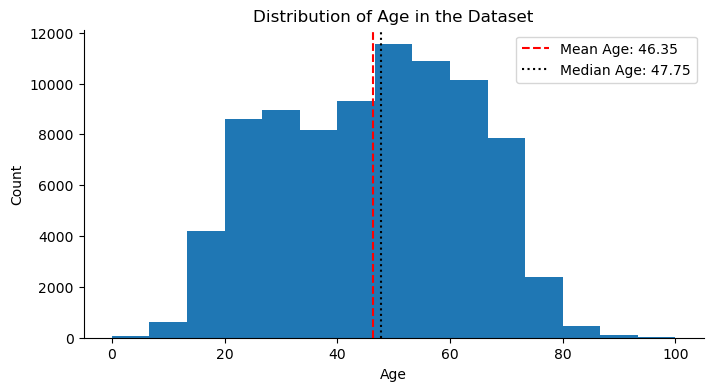

In [192]:
# Getting mean and median ages
mean_age = df_full['Age'].mean()
median_age = df_full['Age'].median()

# Plotting histogram of ages
plt.figure(figsize=(8,4))
plt.hist(df_full['Age'], bins=15)
plt.axvline(mean_age, color='Red', linestyle='--', label=f'Mean Age: {round(mean_age, 2)}')
plt.axvline(median_age, color='Black', linestyle='dotted', label=f'Median Age: {median_age}')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
sns.despine()
plt.title('Distribution of Age in the Dataset')
plt.show()

We see that `Age` seems to be normally distributed, and that the mean and median are both around 47 years old.

We can also look at the mean and median age by country to see if these values differ by country.

In [193]:
# Looking at mean ages by country
df_full.groupby('Country')['Age'].mean().sort_values()

Country
Bosnia              21.539924
Brazil              22.251428
Czech Republic      32.800866
Switzerland, GE     35.662420
Italy               37.474596
Croatia             37.830508
Israel              39.160584
Turkey              39.668571
UK                  40.222445
Greece              40.708758
Macedonia           43.276423
Serbia              43.526519
Poland              43.818894
Portugal            43.957246
Spain               44.482079
Switzerland, FR     44.962000
Austria             46.323401
France              47.541425
Belgium, FR         48.100187
Belgium-Flanders    48.223297
Denmark             48.284891
Netherlands         48.848383
Germany             49.598809
Romania             50.072315
Belgium-Wallonia    50.337415
Iceland             50.671131
Sweden              51.038833
Hungary             52.083702
Norway              52.101446
Name: Age, dtype: float64

In [194]:
# Looking at median ages by country
df_full.groupby('Country')['Age'].median().sort_values()

Country
Brazil              19.320000
Bosnia              20.000000
Switzerland, GE     31.000000
Czech Republic      31.000000
Italy               32.666667
Croatia             35.000000
UK                  37.000000
Turkey              37.000000
Greece              39.000000
Israel              40.000000
Serbia              42.000000
Macedonia           42.000000
Spain               42.916667
Portugal            42.916667
Poland              43.916667
Switzerland, FR     45.000000
France              47.750000
Austria             48.916667
Belgium, FR         49.500000
Norway              50.500000
Iceland             51.000000
Netherlands         51.000000
Belgium-Flanders    51.083333
Germany             51.666667
Denmark             51.916667
Romania             52.000000
Sweden              52.750000
Belgium-Wallonia    53.083333
Hungary             56.166667
Name: Age, dtype: float64

We can see that the mean age is not consistent across countries in the dataset: in Bosnia and Brazil, the mean age is in the early 20's, and it is substantially lower than the mean in many other countries. There are no countries with mean ages *greatly* above the mean for the whole dataset (which suggests that the dataset is imbalanced across countries overall). The median age is fairly close to the mean across the countries.

We can also look at which of our other numerical columns are correlated with `Age`.

In [195]:
# Checking correlations with age
df_full.drop('Age', axis=1).corrwith(df_full['Age']).sort_values(ascending=False)

/var/folders/q2/xb4gqdn94tb91smj01xdsd040000gn/T/ipykernel_21330/76781603.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_full.drop('Age', axis=1).corrwith(df_full['Age']).sort_values(ascending=False)


index           0.138041
CMQ_4           0.102184
Edu_low         0.079741
CMQ_5           0.063688
Pol_Ori         0.063419
galtan          0.063399
Winner_state    0.044027
CM4x            0.033860
lrecon          0.028875
lrgen           0.025065
Edu_high        0.022702
CM5x            0.005849
CPO            -0.000047
CMQ_3          -0.011201
CMQ_2          -0.067177
CMQ_1          -0.085039
dtype: float64

We don't see any particularly strong correlations between the other numerical features and age.

At this point, to avoid losing the rows with missing valus, it seems that our best option might be to impute the missing values in `Age` with the mean age for that country. We will do this using a 'for' loop.

In [196]:
df_full.isna().sum()

index               0
Country             0
Sex                 0
Age              1569
Edu_high         2525
Edu_low          2525
Pol_Ori           773
CPO               773
CMQ_1               0
CMQ_2               0
CMQ_3               0
CMQ_4               0
CMQ_5               0
CM4x                0
CM5x                0
Winner_state    13440
lrgen           21887
lrecon          21887
galtan          21887
dtype: int64

In [197]:
# Ignoring warning
pd.options.mode.chained_assignment = None  # default='warn'

# Imputing missing values in `Age` using mean age for each country
countries = df_full.Country.unique()

for country in countries:
    mean_age = df_full[df_full['Country'] == country]['Age'].mean()
    mask = (df_full['Age'].isnull() == True) & (df_full['Country'] == country)
    df_full['Age'] = np.where(mask, mean_age, df_full['Age'])
    
# Sanity check
print(df_full['Age'].isnull().sum())

0


Let's also check to see that the mean ages in our dataset have not changed as a result of our imputation.

In [198]:
# Looking at mean ages by country again
df_full.groupby('Country')['Age'].mean().sort_values()

Country
Bosnia              21.539924
Brazil              22.251428
Czech Republic      32.800866
Switzerland, GE     35.662420
Italy               37.474596
Croatia             37.830508
Israel              39.160584
Turkey              39.668571
UK                  40.222445
Greece              40.708758
Macedonia           43.276423
Serbia              43.526519
Poland              43.818894
Portugal            43.957246
Spain               44.482079
Switzerland, FR     44.962000
Austria             46.323401
France              47.541425
Belgium, FR         48.100187
Belgium-Flanders    48.223297
Denmark             48.284891
Netherlands         48.848383
Germany             49.598809
Romania             50.072315
Belgium-Wallonia    50.337415
Iceland             50.671131
Sweden              51.038833
Hungary             52.083702
Norway              52.101446
Name: Age, dtype: float64

We see that the mean ages have not changed for each country, and we no longer have any null values for `Age`.

#### Missing Values in `Edu_high` and `Edu_low`

We'll now look at the missing values in our two education columns. These are binary columns which encode information about education status. `Edu_high` is 1 if the respondent has a university degree, 0 otherwise. `Edu_low` is 1 if the respondent did not finish high school, 0 otherwise.

Let's quickly check how these columns break down by country.

In [199]:
# Proportion of respondents with university degrees by country
df_full.groupby('Country')['Edu_high'].mean()

Country
Austria             0.429639
Belgium, FR         0.153558
Belgium-Flanders    0.536804
Belgium-Wallonia    0.585189
Bosnia              0.083650
Brazil              0.207469
Croatia             0.555743
Czech Republic      0.911255
Denmark             0.560533
France              0.559468
Germany             0.732160
Greece              0.716327
Hungary             0.530749
Iceland             0.525424
Israel              0.575682
Italy               0.567988
Macedonia           0.787928
Netherlands         0.711625
Norway              0.547044
Poland              0.415741
Portugal            0.617052
Romania             0.582456
Serbia              0.232401
Spain               0.640446
Sweden              0.438098
Switzerland, FR     0.474120
Switzerland, GE     0.378981
Turkey              0.434399
UK                  0.626737
Name: Edu_high, dtype: float64

In [200]:
# Proportion of respondents without high school diplomas by country
df_full.groupby('Country')['Edu_low'].mean()

Country
Austria             0.215040
Belgium, FR         0.091760
Belgium-Flanders    0.068671
Belgium-Wallonia    0.077951
Bosnia              0.003802
Brazil              0.071231
Croatia             0.076014
Czech Republic      0.008658
Denmark             0.102300
France              0.120718
Germany             0.248615
Greece              0.034694
Hungary             0.134625
Iceland             0.325116
Israel              0.007444
Italy               0.048993
Macedonia           0.003263
Netherlands         0.054931
Norway              0.101285
Poland              0.105848
Portugal            0.064728
Romania             0.050760
Serbia              0.154291
Spain               0.064897
Sweden              0.099863
Switzerland, FR     0.418219
Switzerland, GE     0.375796
Turkey              0.013230
UK                  0.025874
Name: Edu_low, dtype: float64

We see that there are many more respondents with university degrees than there are respondents who didn't finish high school. We also see quite a bit of variability between countries with respect to these features.

It seems that a straightforward solution here is to simply interpret what these columns mean as *known* or *disclosed* university degree, and *known* or *disclosed* lack of high school completion. We can count all of the null values here as 0.

In [201]:
# Imputing missing values
df_full['Edu_high'] = np.where(df_full['Edu_high'].isna() == True, 0, df_full['Edu_high'])
df_full['Edu_low'] = np.where(df_full['Edu_low'].isna() == True, 0, df_full['Edu_low'])

# Sanity check
print(df_full['Edu_high'].isna().sum())
print(df_full['Edu_low'].isna().sum())

0
0


In [202]:
# Checking if this has changed our means by country
df_full.groupby('Country')['Edu_high'].mean()

Country
Austria             0.429639
Belgium, FR         0.153558
Belgium-Flanders    0.536804
Belgium-Wallonia    0.585189
Bosnia              0.083650
Brazil              0.207469
Croatia             0.548333
Czech Republic      0.911255
Denmark             0.560533
France              0.559468
Germany             0.486574
Greece              0.714868
Hungary             0.530749
Iceland             0.507440
Israel              0.555024
Italy               0.567988
Macedonia           0.785366
Netherlands         0.693407
Norway              0.530409
Poland              0.415741
Portugal            0.617052
Romania             0.581776
Serbia              0.232177
Spain               0.640446
Sweden              0.438098
Switzerland, FR     0.458000
Switzerland, GE     0.378981
Turkey              0.395186
UK                  0.579787
Name: Edu_high, dtype: float64

In [203]:
df_full.groupby('Country')['Edu_low'].mean()

Country
Austria             0.215040
Belgium, FR         0.091760
Belgium-Flanders    0.068671
Belgium-Wallonia    0.077951
Bosnia              0.003802
Brazil              0.071231
Croatia             0.075000
Czech Republic      0.008658
Denmark             0.102300
France              0.120718
Germany             0.165223
Greece              0.034623
Hungary             0.134625
Iceland             0.313988
Israel              0.007177
Italy               0.048993
Macedonia           0.003252
Netherlands         0.053524
Norway              0.098205
Poland              0.105848
Portugal            0.064728
Romania             0.050701
Serbia              0.154143
Spain               0.064897
Sweden              0.099863
Switzerland, FR     0.404000
Switzerland, GE     0.375796
Turkey              0.012036
UK                  0.023936
Name: Edu_low, dtype: float64

We see that the missing values has been filled, and this has not greatly impacted the mean values for each country.

#### Missing Values in `Pol_Ori`, `CPO`, `lrgen`, `lrecon`, and `galtan`

All of these columns are measures of political orientation on some version of a left-right spectrum. If we have information in at least one of these columns, we might be able to impute the others (perhaps also taking into account the respondent's country).

Let's first see how many rows are missing values for all of these columns.

In [204]:
# Counting rows with missing values in all or some of the political spectrum columns
missing_mask_and = (df_full['Pol_Ori'].isna() == True) & (df_full['CPO'].isna() == True) & (df_full['lrgen'].isna() == True) & (df_full['lrgen'].isna() == True) & (df_full['galtan'].isna() == True)
missing_mask_or = (df_full['Pol_Ori'].isna() == True) | (df_full['CPO'].isna() == True) | (df_full['lrgen'].isna() == True) | (df_full['lrgen'].isna() == True) | (df_full['galtan'].isna() == True)

print(len(df_full[missing_mask_and]), "rows missing values in all of the columns.")
print(len(df_full[missing_mask_or]), "rows missing values in at least one of the columns.")

579 rows missing values in all of the columns.
22081 rows missing values in at least one of the columns.


We see that only 579 rows are missing values in all of these columns and 22,081 are missing values in at least one of them. We will deal with the 579 rows missing all of these values later. For now, let's focus on the ones where one value might be imputed from another.

Let's first look at the correlations between all of these features.

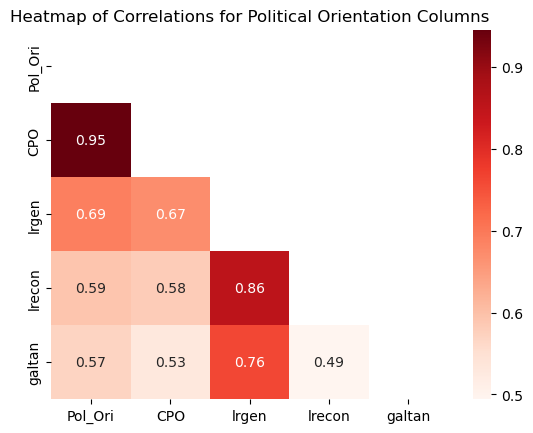

In [205]:
# Getting correlations
ori_df = df_full[['Pol_Ori','CPO','lrgen','lrecon','galtan']]
corrs = ori_df.corr()

# Plotting on heatmap 
sns.heatmap(corrs, cmap='Reds', mask=np.triu(np.ones_like(corrs, dtype=bool)), annot=True)
plt.title('Heatmap of Correlations for Political Orientation Columns')
plt.show()

We will try to fill these based on the values in the others that have the strongest correlations.

First, let's look at `Pol_Ori`. We see that the strongest correlations here are with `CPO` and `lrgen`. Let's see how these columns compare using scatterplots.

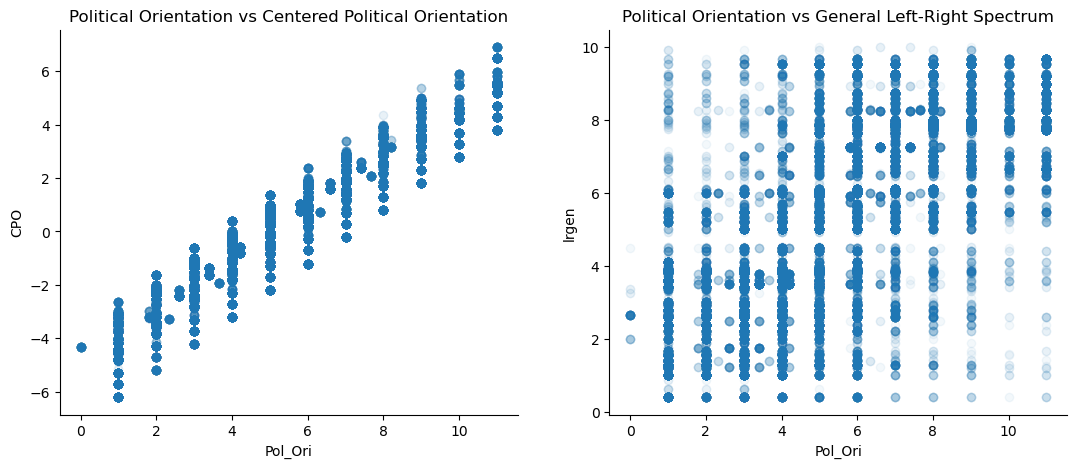

In [206]:
plt.subplots(1,2, figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(ori_df['Pol_Ori'], ori_df['CPO'], alpha=.05)
plt.xlabel('Pol_Ori')
plt.ylabel('CPO')
plt.title('Political Orientation vs Centered Political Orientation')

plt.subplot(1,2,2)
plt.scatter(ori_df['Pol_Ori'], ori_df['lrgen'], alpha=.05)
plt.xlabel('Pol_Ori')
plt.ylabel('lrgen')
plt.title('Political Orientation vs General Left-Right Spectrum')


sns.despine()
plt.show()

We see a clear linear relationship between `Pol_Ori` and `CPO`. This makes sense, since `CPO` is just the centered version of the former column: it puts the respondent's self-reported political orientation on a centered version of a left-right scale (where the center depends on the country).

In fact, because the linear relationship between these features is so strong, we can simply drop one of them for the purpose of modelling and analysis. Let's keep `Pol_Ori` and drop `CPO`.

In [207]:
# Dropping `CPO`
#df_full = df_full.drop(columns='CPO')

# Sanity Check
#df_full.info()

We also see a linear relationship (albeit less clearly) between `Pol_Ori` and `lrgen`. Let's see what the mean ratio between these is in our data.

In [208]:
# Mean ratio between Pol_Ori and lrgen
ratios = df_full['Pol_Ori'] / df_full['lrgen']
ratio = ratios.mean()
ratio

1.2275105259027523

We see that on average, the value for `Pol_Ori` is about 1.2 times the value for `lrgen`. Let's see if we can impute some of the missing `Pol_Ori` values using this ratio.

In [209]:
# Checking how many rows we can impute
po_missing_mask = (df_full['Pol_Ori'].isnull() == True) & (df_full['lrgen'].isnull() == False)
len(df_full[po_missing_mask])

194

In [210]:
# Imputing for the 81 rows
df_full['Pol_Ori'] = np.where(po_missing_mask, df_full['lrgen'] * ratio, df_full['Pol_Ori'])

In [211]:
# Sanity check
len(df_full[po_missing_mask])

194

In [212]:
# Sanity check
len(df_full[df_full['Pol_Ori'].isna() == True])

579

We managed to impute 194 values in `Pol_Ori` based on `lrgen` values. Let's see how we can deal with the other missing values here: are there rows containing values for `lrecon` or `galtan` but not `Pol_Ori`?

In [213]:
# Checking how many `Pol_Ori` values can be imputed from `lrecon`
po_missing_mask2 = (df_full['Pol_Ori'].isnull() == True) & (df_full['lrecon'].isnull() == False)
len(df_full[po_missing_mask2])

0

In [214]:
# Checking how many `Pol_Ori` values can be imputed from `galtan`
po_missing_mask3 = (df_full['Pol_Ori'].isnull() == True) & (df_full['galtan'].isnull() == False)
len(df_full[po_missing_mask3])

0

Unfortuantely, we will not be able to impute any more values for `Pol_Ori` based on `lregen` or `galtan`. Since these rows are missing values in all of these columns, we would argue that the best thing to do is to drop these (since we cannot reasonably impute based on other values, and we are missing data across a broad range of our predictors). We will do so now.

In [215]:
# Dropping remaining rows missing data in `Pol_Ori`
df_full = df_full.dropna(subset=['Pol_Ori'])

# Sanity Check
len(df_full[df_full['Pol_Ori'].isna() == True])

0

In [216]:
# Checking null in CPO
df_full.CPO.isna().sum()

194

In [217]:
# Checking ratio between CPO and Pol_Ori
C_ratios = df_full.CPO / (df_full.Pol_Ori + 1)
C_ratios
C_ratio = C_ratios.mean()
C_ratio

-0.21680573369657394

In [218]:
df_full.CPO.mean()

-0.013571446242047697

In [219]:
C_mask = df_full.CPO.isna() == True

# Fill using ratio
df_full['CPO'] = np.where(C_mask, (df_full['Pol_Ori']+1)*C_ratio, df_full['CPO'])

# Check
df_full.CPO.mean()


-0.01765242710964312

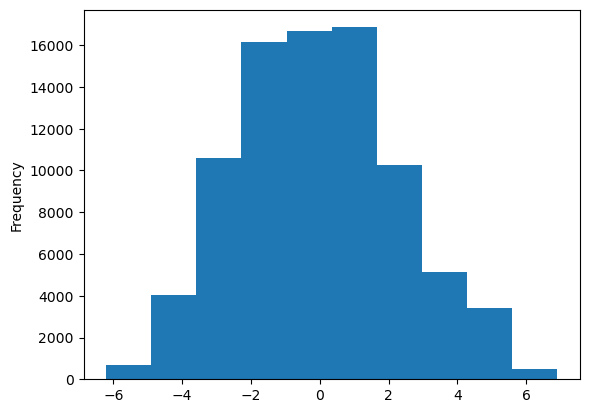

In [220]:
df_full.CPO.plot(kind='hist')
plt.show()

Let's look at the missing values in `lrgen`, `lrecon`, and `galtan` now. We saw similar numbers of rows missing for all three of these columns. Let's check whether they are *all* missing on rows where any are missing.

In [221]:
# Creating condition for at least one is missing but not all are missing
condition = ((df_full.lrgen.isna() == True) | (df_full.lrecon.isna() == True) | (df_full.galtan.isna() == True)) & ~((df_full.lrgen.isna() == True) & (df_full.lrecon.isna() == True) & (df_full.galtan.isna() == True))

# Counting rows where condition is met
len(df_full[condition])

0

We see that these columns are all missing together on rows where any one is missing. Therefore, although these are correlated with each other, we cannot impute any values based on the others. However, we saw that these columns have decently strong correlations with `Pol_Ori`. So, we can impute the missing values based on the mean ratio we observe between these columns.

We'll add 1 to `Pol_Ori` when calculating the ratios to avoid dividing by 0.

In [222]:
# Calculating ratios between `Pol_Ori` and the other columns

# lrgen
gen_ratios = df_full['lrgen'] / (df_full['Pol_Ori'] + 1)
gen_ratio = gen_ratios.mean()
gen_ratio

0.8431161270686126

In [223]:
# lrecon
econ_ratios = df_full['lrecon'] / (df_full['Pol_Ori'] + 1)
econ_ratio = econ_ratios.mean()
econ_ratio

0.7960397270829707

In [224]:
# galtan
g_ratios = df_full['galtan'] / (df_full['Pol_Ori'] + 1)
g_ratio = g_ratios.mean()
g_ratio

0.7185369353012379

We'll now impute the missing values for these columns based on `Pol_Ori`.

In [225]:
# Missing mask for gen
gen_missing = df_full.lrgen.isna() == True

# Filling using ratio
df_full['lrgen'] = np.where(gen_missing, (df_full['Pol_Ori']+1)*gen_ratio, df_full['lrgen'])

# Sanity check
df_full['lrgen'].isna().sum()

0

We see that the values in `lrgen` are now filled. We'll now repeat this step for the other two columns.

In [226]:
# Missing mask for lrecon
econ_missing = df_full.lrecon.isna() == True

# Filling using ratio
df_full['lrecon'] = np.where(econ_missing, (df_full['Pol_Ori']+1)*econ_ratio, df_full['lrecon'])

# Sanity check
df_full['lrecon'].isna().sum()

0

In [227]:
# Missing mask for galtan
g_missing = df_full.galtan.isna() == True

# Filling using ratio
df_full['galtan'] = np.where(g_missing, (df_full['Pol_Ori']+1)*g_ratio, df_full['galtan'])

# Sanity check
df_full['galtan'].isna().sum()

0

We see that all of the values have now been filled for these columns. Let's look at the missing values once more in our dataset.

In [228]:
df_full.isna().sum()

index               0
Country             0
Sex                 0
Age                 0
Edu_high            0
Edu_low             0
Pol_Ori             0
CPO                 0
CMQ_1               0
CMQ_2               0
CMQ_3               0
CMQ_4               0
CMQ_5               0
CM4x                0
CM5x                0
Winner_state    12980
lrgen               0
lrecon              0
galtan              0
dtype: int64

We see that the last column to deal with is `Winner_state`.

#### Missing Values in `Winner_state`

Our strategy for imputing values in `Winner_state` will be to look at rows from the same country as the missing values, and then look at the ones with the similar `Pol_Ori` scores. We'll try to match values for `Winner_state` based on these values. (The idea here is that if people in the same country share the same self-reported political orientation, then it is likely that they have similar preferences in political parties).

In [229]:
# Checking mean value before imputing
df_full.Winner_state.mean()

0.29844004264631613

In [230]:
# Resetting index
df_full.reset_index(drop=True, inplace=True)

In [231]:
# Creating loop to impute values for `Winner_state`
missing_mask = (df_full['Winner_state'].isna() == True)

for country in df_full.Country.unique():
    
    country_mask = (df_full['Country'] == country)

    for index in list(df_full[country_mask & missing_mask].index):
        
        # Finding similar scores in `Pol_Ori`
        po = df_full.iloc[index]['Pol_Ori']
        similar_scores = df_full[country_mask][((df_full['Pol_Ori'] - po) < 1) & ((df_full['Pol_Ori'] - po) > -1)]
        
        # Finding mean `Winner_state` value for rows with similar scores
        mean_ws = similar_scores['Winner_state'].mean()
        
        # Rounding to 1 or 0
        if mean_ws >= 0.5:
            df_full.iloc[index, df_full.columns.get_loc('Winner_state')] = 1

        elif mean_ws < 0.5:
            df_full.iloc[index, df_full.columns.get_loc('Winner_state')] = 0


/var/folders/q2/xb4gqdn94tb91smj01xdsd040000gn/T/ipykernel_21330/1591786933.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  similar_scores = df_full[country_mask][((df_full['Pol_Ori'] - po) < 1) & ((df_full['Pol_Ori'] - po) > -1)]


In [232]:
# Sanity check
df_full.Winner_state.mean()

0.28744184942561474

In [233]:
# Checking if NA values remain
df_full.isna().sum()

index           0
Country         0
Sex             0
Age             0
Edu_high        0
Edu_low         0
Pol_Ori         0
CPO             0
CMQ_1           0
CMQ_2           0
CMQ_3           0
CMQ_4           0
CMQ_5           0
CM4x            0
CM5x            0
Winner_state    0
lrgen           0
lrecon          0
galtan          0
dtype: int64

In [234]:
# Dropping duplicated `index` column
df_full.drop(columns='index', inplace=True)

We see that the values in `Winner_state` have been filled. There are no more missing values in the dataset, and we can move on to feature engineering.

<a id = 'part2'></a>
### Part 2 - Feature Engineering and Target Encoding

<a id = '2.1'></a>
#### 2.1 - Feature Engineering

We will now add certain features to the dataset to include in our modelling and analysis as predictors. We cannot just add individual-level features about the respondents to the surveys, but we can add certain *country-level* features based on external research about the country (and based on our knowledge that the surveys took place in early 2018). The features we will add are the following:
- **2017 unemployment percentage** for each country (from the [World Bank](https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS))
- **2017 GDP** for each country (also from the [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD))
- The Economist Intelligence Unit's **Democracy Index**, which is an expert rating of the level of democracy for each country (available [here](https://www.eiu.com/public/topical_report.aspx?campaignid=DemocracyIndex2017))

We'll add each of these features to the dataset, and then in the next section, we'll look at how they correlate with our target features.

We'll begin by renaming the countries in our dataset to match the names in the datasets that we will be merging with them.

In [235]:
# Creating list of country names
country_dict = {}

country_dict['Belgium, FR'] = 'Belgium'
country_dict['Belgium-Wallonia'] = 'Belgium'
country_dict['Belgium-Flanders'] = 'Belgium'
country_dict['Bosnia'] = 'Bosnia and Herzegovina'
country_dict['Switzerland, FR'] = 'Switzerland'
country_dict['Switzerland, GE'] = 'Switzerland'
country_dict['Czech Republic'] = 'Czechia'
country_dict['Macedonia'] = 'North Macedonia'
country_dict['Turkey'] = 'Turkiye'
country_dict['UK'] = 'United Kingdom'

# Sanity check
country_dict

{'Belgium, FR': 'Belgium',
 'Belgium-Wallonia': 'Belgium',
 'Belgium-Flanders': 'Belgium',
 'Bosnia': 'Bosnia and Herzegovina',
 'Switzerland, FR': 'Switzerland',
 'Switzerland, GE': 'Switzerland',
 'Czech Republic': 'Czechia',
 'Macedonia': 'North Macedonia',
 'Turkey': 'Turkiye',
 'UK': 'United Kingdom'}

In [236]:
# Updating country names
for old, new in country_dict.items():
    df_full['Country'][df_full['Country'] == old] = new

# Sanity check
df_full['Country'].unique()

array(['Iceland', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Switzerland', 'Croatia', 'Czechia', 'France', 'Greece', 'Hungary',
       'Italy', 'North Macedonia', 'Netherlands', 'Poland', 'Serbia',
       'Spain', 'Turkiye', 'Norway', 'Germany', 'Israel', 'Portugal',
       'Romania', 'United Kingdom', 'Sweden', 'Austria', 'Denmark'],
      dtype=object)

We see that the country names have been updated. We'll now load the new dataset and merge the relevant columns.

In [237]:
# Loading GDP data
gdp_df = pd.read_csv('data/gdp_data.csv')

# Checking the head
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,3.201437e+10,3.326951e+10,3.632779e+10,4.163897e+10,4.462989e+10,4.917337e+10,5.312346e+10,6.948272e+10,8.538065e+10,9.083543e+10,9.021275e+10,1.022410e+11,1.160850e+11,1.342570e+11,1.712180e+11,1.758590e+11,1.680960e+11,1.755650e+11,1.606470e+11,1.367590e+11,1.530500e+11,1.866580e+11,2.047660e+11,2.182420e+11,2.540620e+11,2.768570e+11,2.460880e+11,2.429260e+11,2.396110e+11,2.703270e+11,2.694910e+11,2.834460e+11,2.666520e+11,2.630250e+11,2.847590e+11,2.596430e+11,2.665290e+11,3.541770e+11,4.404820e+11,5.139420e+11,5.775870e+11,6.628680e+11,7.105360e+11,7.219010e+11,8.635200e+11,9.678250e+11,9.753550e+11,9.859870e+11,1.006530e+12,9.273480e+11,8.851760e+11,1.021040e+12,1.007200e+12,1.000830e+12,9.275930e+11,1.082000e+12,1.169480e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.854235e+09,4.539497e+09,5.220825e+09,6.226199e+09,6.971383e+09,9.715765e+09,1.024977e+10,1.215484e+10,1.563384e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,1.591084e+10,1.451058e+10,1.496824e+10,1.697932e+10,2.359616e+10,2.093636e+10,2.538617e+10,3.197559e+10,4.441668e+10,5.166719e+10,6.235162e+10,6.559512e+10,7.149650e+10,8.894834e+10,1.124390e+11,2.113380e+11,1.874490e+11,1.383840e+11,1.145160e+11,1.167770e+11,1.078870e+11,1.107290e+11,1.094390e+11,1.022550e+11,1.223870e+11,1.180400e+11,1.188930e+11,9.927218e+10,8.663640e+10,1.086910e+11,1.262870e+11,1.276020e+11,1.306780e+11,1.380860e+11,1.409460e+11,1.485300e+11,1.772010e+11,2.052140e+11,2.542650e+11,3.108900e+11,3.969210e+11,4.654860e+11,5.677910e+11,5.083630e+11,5.985220e+11,6.820160e+11,7.375890e+11,8.339480e+11,8.943220e+11,7.686450e+11,6.913630e+11,6.848990e+11,7.670260e+11,8.225380e+11,7.864600e+11,8.444600e+11,8.778630e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.554065e+09,7.072536e+09,8.084412e+09,8.769837e+09,1.020178e+10,1.122952e+10,1.270456e+10,1.511435e+10,1.105194e+10,3.390500e+09,5.561222e+09,7.526964e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936079e+09,1.528559e+10,1.781270e+10,2.355206e+10,3.697090e+10,5.238103e+10,6.526642e+10,8.853866e+10,7.030720e+10,8.169953e+10,1.094370e+11,1.249980e+11,

We need to keep only the `Country Name` and `2017` columns. We'll drop the other ones now, and then merge with our original dataset.

In [238]:
# Dropping unneeded columns
gdp_df = gdp_df[['Country Name','2017']]

# Sanity check
gdp_df.head()

,Country Name,2017
0,Aruba,3.092179e+09
1,Africa Eastern and Southern,1.021040e+12
2,Afghanistan,1.889635e+10
3,Africa Western and Central,6.848990e+11
4,Angola,6.897277e+10


In [239]:
# Merging dataframes
df_full = pd.merge(df_full, gdp_df, how='left', left_on='Country', right_on='Country Name')

# Sanity Check
df_full.head()

,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CPO,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan,Country Name,2017
0,Iceland,male,33.0,1.0,0.0,4.2,-0.827639,11.0,10.0,1.0,7.0,1.0,5.00,6.0,0.0,4.384204,4.139407,3.736392,Iceland,2.472829e+10
1,Iceland,male,28.0,1.0,0.0,4.2,-0.827639,7.0,7.0,4.0,3.0,5.0,4.75,5.2,0.0,4.384204,4.139407,3.736392,Iceland,2.472829e+10
2,Iceland,male,55.0,1.0,0.0,5.0,-0.027639,5.0,8.0,6.0,4.0,3.0,4.50,5.2,1.0,5.058697,4.776238,4.311222,Iceland,2.472829e+10
3,Iceland,male,52.0,0.0,1.0,5.8,0.772361,8.0,6.0,5.0,7.0,6.0,6.50,6.4,0.0,5.733190,5.413070,4.886051,Iceland,2.472829e+10
4,Iceland,male,56.0,0.0,1.0,5.0,-0.027639,11.0,11.0,1.0,9.0,7.0,7.00,7.8,0.0,5.058697,4.776238,4.311222,Iceland,2.472829e+10


In [240]:
# Dropping extra `Country Name` column
df_full.drop(columns='Country Name', inplace=True)

# Renaming `2017` to `2017_GDP
df_full.rename(columns={'2017':'2017_GDP'}, inplace=True)

# Sanity check
df_full.head()

,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CPO,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP
0,Iceland,male,33.0,1.0,0.0,4.2,-0.827639,11.0,10.0,1.0,7.0,1.0,5.00,6.0,0.0,4.384204,4.139407,3.736392,2.472829e+10
1,Iceland,male,28.0,1.0,0.0,4.2,-0.827639,7.0,7.0,4.0,3.0,5.0,4.75,5.2,0.0,4.384204,4.139407,3.736392,2.472829e+10
2,Iceland,male,55.0,1.0,0.0,5.0,-0.027639,5.0,8.0,6.0,4.0,3.0,4.50,5.2,1.0,5.058697,4.776238,4.311222,2.472829e+10
3,Iceland,male,52.0,0.0,1.0,5.8,0.772361,8.0,6.0,5.0,7.0,6.0,6.50,6.4,0.0,5.733190,5.413070,4.886051,2.472829e+10
4,Iceland,male,56.0,0.0,1.0,5.0,-0.027639,11.0,11.0,1.0,9.0,7.0,7.00,7.8,0.0,5.058697,4.776238,4.311222,2.472829e+10


We now have a country-level column for each row representing the GDP for the respondent's country in the previous year. Let's do one more check, looking at the GDP by country.

In [241]:
# Checking GDP by country
df_full.groupby('Country')['2017_GDP'].mean().sort_values(ascending=False)

Country
Germany                   3.690850e+12
United Kingdom            2.683490e+12
France                    2.595150e+12
Brazil                    2.063510e+12
Italy                     1.961800e+12
Spain                     1.313250e+12
Turkiye                   8.589890e+11
Netherlands               8.338700e+11
Switzerland               6.952010e+11
Sweden                    5.410190e+11
Poland                    5.246410e+11
Belgium                   5.027650e+11
Austria                   4.172610e+11
Norway                    4.017450e+11
Israel                    3.582450e+11
Denmark                   3.321210e+11
Portugal                  2.213580e+11
Czechia                   2.186290e+11
Romania                   2.101470e+11
Greece                    1.998440e+11
Hungary                   1.431120e+11
Croatia                   5.593748e+10
Serbia                    4.417908e+10
Iceland                   2.472829e+10
Bosnia and Herzegovina    1.832638e+10
North Macedonia  

This looks correct. We'll now repeat the same process for the 2017 unemployment data.

In [242]:
# Loading 2017 unemployment data
unemployment = pd.read_csv('data/unemployment.csv')

# Checking the first few rows
unemployment.head()

,Country Name,2017,2018
0,Aruba,NaN,NaN
1,Africa Eastern and Southern,6.940365,6.913046
2,Afghanistan,11.180000,11.110000
3,Africa Western and Central,4.140484,4.201599
4,Angola,9.535000,9.522000


We have two years here. We'll keep just the `2017` column.

In [243]:
# Merging unemployment data to df_full
df_full = pd.merge(df_full, unemployment, how='left', left_on='Country', right_on='Country Name')

# Renaming 2017 column to 2017_unemployment
df_full.rename(columns={'2017':'2017_unemployment'}, inplace=True)

# Dropping second 'Country Name' column
df_full.drop(columns=['Country Name','2018'], inplace=True)

# Sanity check
df_full.head()

,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CPO,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment
0,Iceland,male,33.0,1.0,0.0,4.2,-0.827639,11.0,10.0,1.0,7.0,1.0,5.00,6.0,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74
1,Iceland,male,28.0,1.0,0.0,4.2,-0.827639,7.0,7.0,4.0,3.0,5.0,4.75,5.2,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74
2,Iceland,male,55.0,1.0,0.0,5.0,-0.027639,5.0,8.0,6.0,4.0,3.0,4.50,5.2,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74
3,Iceland,male,52.0,0.0,1.0,5.8,0.772361,8.0,6.0,5.0,7.0,6.0,6.50,6.4,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74
4,Iceland,male,56.0,0.0,1.0,5.0,-0.027639,11.0,11.0,1.0,9.0,7.0,7.00,7.8,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74


We now have a country-level column for unemployment rate in the previous year. Let's again look at the numbers by country for this column.

In [244]:
# Checking unemployment rate by country
df_full.groupby('Country')['2017_unemployment'].mean().sort_values(ascending=False)

Country
North Macedonia           22.81
Greece                    21.49
Bosnia and Herzegovina    20.53
Spain                     17.22
Serbia                    13.48
Brazil                    12.93
Italy                     11.21
Croatia                   11.21
Turkiye                   10.82
France                     9.41
Portugal                   8.87
Belgium                    7.09
Sweden                     6.72
Denmark                    5.83
Austria                    5.50
Romania                    4.93
Poland                     4.89
Netherlands                4.84
Switzerland                4.80
United Kingdom             4.33
Israel                     4.22
Norway                     4.16
Hungary                    4.16
Germany                    3.75
Czechia                    2.89
Iceland                    2.74
Name: 2017_unemployment, dtype: float64

Again, this looks to be correct. Finally, we'll repeat the process for the 2017 Economist Democracy Index.

In [245]:
# Loading democracy index data
democracy = pd.read_csv('data/democracy2017.csv')

# Checking the first few rows
democracy.head()

,Country,Democracy_Score
0,Austria,9
1,Belgium,9
2,Bosnia and Herzegovina,6
3,Brazil,7
4,Croatia,7


In [246]:
# Merging democracy_score with df_full
df_full = pd.merge(df_full, democracy, left_on='Country', right_on='Country', how='left')

# Sanity Check
df_full.head()

,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CPO,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score
0,Iceland,male,33.0,1.0,0.0,4.2,-0.827639,11.0,10.0,1.0,7.0,1.0,5.00,6.0,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10
1,Iceland,male,28.0,1.0,0.0,4.2,-0.827639,7.0,7.0,4.0,3.0,5.0,4.75,5.2,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10
2,Iceland,male,55.0,1.0,0.0,5.0,-0.027639,5.0,8.0,6.0,4.0,3.0,4.50,5.2,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10
3,Iceland,male,52.0,0.0,1.0,5.8,0.772361,8.0,6.0,5.0,7.0,6.0,6.50,6.4,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10
4,Iceland,male,56.0,0.0,1.0,5.0,-0.027639,11.0,11.0,1.0,9.0,7.0,7.00,7.8,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10


Let's now check the democracy index score for each country.

In [247]:
# Checking democracy index by country
df_full.groupby('Country')['Democracy_Score'].mean().sort_values(ascending=False)

Country
Iceland                   10.0
Sweden                    10.0
Denmark                   10.0
Austria                    9.0
Switzerland                9.0
Spain                      9.0
Portugal                   9.0
Norway                     9.0
Netherlands                9.0
Belgium                    9.0
Israel                     9.0
United Kingdom             9.0
Germany                    9.0
France                     9.0
Czechia                    8.0
Romania                    8.0
Italy                      8.0
Greece                     7.0
North Macedonia            7.0
Croatia                    7.0
Brazil                     7.0
Hungary                    6.0
Poland                     6.0
Serbia                     6.0
Bosnia and Herzegovina     6.0
Turkiye                    0.0
Name: Democracy_Score, dtype: float64

This matches the scores in the Economist report. We can now move on to working on the encoding of our target variables.

<a id = '2.2'></a>
#### 2.2 - Target Encoding

Our target will be `CM5x`, which is an average of respondents' responses to the individual CMQ items. It appears that this column is coded from 1 to 11. This is somewhat more difficult to interpret, since the CMQ scale for agreement is from 0 to 10. Let's try to confirm this, and then adjust the scale if necessary.

In [248]:
# Checking scale of `CM5x`
print(df_full['CM5x'].max())
print(df_full['CM5x'].min())
print(df_full['CM5x'].mean())

11.0
1.0
6.779949708324103


In [249]:
# Adjusting scale to 0-10
df_full['CM5x'] = df_full['CM5x'] - 1

# Sanity check
print(df_full['CM5x'].max())
print(df_full['CM5x'].min())
print(df_full['CM5x'].mean())

10.0
0.0
5.779949708324103


This makes more sense, since it's now on the same scale as the original CMQ. Let's also do the same to the other CMQ-related columns for consistency.

In [250]:
# Checking other CM_ columns

# CM4x
print(df_full['CM4x'].max())
print(df_full['CM4x'].min())
print(df_full['CM4x'].mean())

11.0
1.0
6.499406099349136


In [251]:
# Adjusting scale to 0-10
df_full['CM4x'] = df_full['CM4x'] - 1

# Sanity check
print(df_full['CM4x'].max())
print(df_full['CM4x'].min())
print(df_full['CM4x'].mean())

10.0
0.0
5.499406099349136


In [252]:
# CMQ Columns
cmqs = ['CMQ_1', 'CMQ_2', 'CMQ_3', 'CMQ_4', 'CMQ_5']
for col in cmqs:
    df_full[col] = df_full[col] - 1
    print(col)
    print("New Max:", df_full[col].max())
    print("New Min:", df_full[col].min(),"\n")

CMQ_1
New Max: 10.0
New Min: 0.0 

CMQ_2
New Max: 10.0
New Min: 0.0 

CMQ_3
New Max: 10.0
New Min: 0.0 

CMQ_4
New Max: 10.0
New Min: 0.0 

CMQ_5
New Max: 10.0
New Min: 0.0 



We now have all the CMQ-related columns on the same scale as the original questionnaire responses.

The other step we want to take with our target column is to create a binary, categorical version of the column which will allow us to construct classification (as well as regression) models. To do this, we will first look at the distribution of `CM5x`, including the mean, the median, and the standard deviation.

In [253]:
# Calculate mean, median, and standard deviation
from scipy import stats

sd = stats.tstd(df_full['CM5x'])
mean = df_full['CM5x'].mean()
median = df_full['CM5x'].median()
one_sd_from_mean = mean+sd
print(f"The standard deviation for CM5x is {sd}")
print(f"The mean for CM5x is {mean}")
print(f"The median for CM5x is {median}")
print(f"The mean plus one standard deviation is {one_sd_from_mean}")

The standard deviation for CM5x is 2.1570722993068743
The mean for CM5x is 5.779949708324103
The median for CM5x is 5.8
The mean plus one standard deviation is 7.937022007630977


We see that the mean for this column is about 5.8, the median is also about 5.8, and the standard deviation is about 2.16. This is fairly high--we're seeing that across the dataset, people express more agreement than disagreement with CMQ items on average.

Let's now plot the distribution of `CM5x` scores, including the mean and the mean plus one standard deviation.

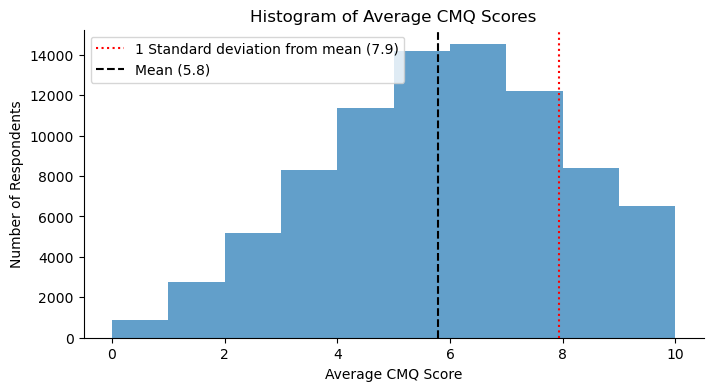

In [254]:
# Showing distribution of y using histogram
plt.figure(figsize=(8,4))

plt.hist(df_full['CM5x'], alpha=.7)
plt.title('Histogram of Average CMQ Scores')
plt.axvline(x=mean+sd, color='Red', linestyle='dotted', label='1 Standard deviation from mean (7.9)')
plt.axvline(x=mean, color='Black', linestyle='--', label='Mean (5.8)')
plt.xlabel('Average CMQ Score')
plt.ylabel('Number of Respondents')
plt.legend()
sns.despine()
plt.show()

We can see that CMQ scores on average look somewhat like a normal distribution, but with higher counts on the right side of the distribution.

To give us options when modelling, we will create two versions of a categorical column based on `CM5x`: one for simply being above average, and another for being 'high,' or one standard deviation above average or more. Let's add these columns now.

In [255]:
# Creating 'above average' column
df_full['CMQ_above_avg'] = np.where(df_full['CM5x'] > mean, 1, 0)

# Sanity check
df_full.head()

,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CPO,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score,CMQ_above_avg
0,Iceland,male,33.0,1.0,0.0,4.2,-0.827639,10.0,9.0,0.0,6.0,0.0,4.00,5.0,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0
1,Iceland,male,28.0,1.0,0.0,4.2,-0.827639,6.0,6.0,3.0,2.0,4.0,3.75,4.2,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0
2,Iceland,male,55.0,1.0,0.0,5.0,-0.027639,4.0,7.0,5.0,3.0,2.0,3.50,4.2,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,0
3,Iceland,male,52.0,0.0,1.0,5.8,0.772361,7.0,5.0,4.0,6.0,5.0,5.50,5.4,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10,0
4,Iceland,male,56.0,0.0,1.0,5.0,-0.027639,10.0,10.0,0.0,8.0,6.0,6.00,6.8,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,1


In [256]:
# Creating 'high' column
df_full['CMQ_high'] = np.where(df_full['CM5x'] > one_sd_from_mean, 1, 0)

# Sanity check
df_full.head(15)

,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CPO,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score,CMQ_above_avg,CMQ_high
0,Iceland,male,33.0,1.0,0.0,4.2,-0.827639,10.0,9.0,0.0,6.0,0.0,4.00,5.0,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,0
1,Iceland,male,28.0,1.0,0.0,4.2,-0.827639,6.0,6.0,3.0,2.0,4.0,3.75,4.2,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,0
2,Iceland,male,55.0,1.0,0.0,5.0,-0.027639,4.0,7.0,5.0,3.0,2.0,3.50,4.2,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,0,0
3,Iceland,male,52.0,0.0,1.0,5.8,0.772361,7.0,5.0,4.0,6.0,5.0,5.50,5.4,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10,0,0
4,Iceland,male,56.0,0.0,1.0,5.0,-0.027639,10.0,10.0,0.0,8.0,6.0,6.00,6.8,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,1,0
5,Iceland,male,74.0,0.0,1.0,7.4,2.372361,8.0,8.0,8.0,8.0,8.0,8.00,8.0,1.0,7.082175,6.686734,6.035710,2.472829e+10,2.74,10,1,1
6,Iceland,female,43.0,0.0,1.0,7.4,2.372361,7.0,9.0,4.0,6.0,1.0,4.50,5.4,1.0,7.082175,6.686734,6.035710,2.472829e+10,2.74,10,0,0
7,Iceland,female,55.0,0.0,0.0,5.0,-0.027639,10.0,10.0,5.0,10.0,10.0,8.75,9.0,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,1,1
8,Iceland,male,38.0,1.0,0.0,5.8,0.772361,7.0,2.0,2.0,6.0,8.0,5.75,5.0,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10,0,0
9,Iceland,male,37.0,1.0,0.0,9.0,3.972361,6.0,6.0,3.0,5.0,2.0,4.00,4.4,1.0,8.431161,7.960397,7.185369,2.472829e+10,2.74,10,0,0


We now have the full, cleaned version of the dataset that we will use for modelling. We will save this to a .csv file now for future use.

In [257]:
# Saving clean dataset to csv
#df_full.to_csv('df_full_clean.csv', index=False) # Uncomment this line to save clean version

In [258]:
pd.read_csv('df_full_clean.csv').head()

,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CPO,CMQ_1,CMQ_2,CMQ_3,CMQ_4,CMQ_5,CM4x,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score,CMQ_above_avg,CMQ_high
0,Iceland,male,33.0,1.0,0.0,4.2,-0.827639,10.0,9.0,0.0,6.0,0.0,4.00,5.0,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,0
1,Iceland,male,28.0,1.0,0.0,4.2,-0.827639,6.0,6.0,3.0,2.0,4.0,3.75,4.2,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,0
2,Iceland,male,55.0,1.0,0.0,5.0,-0.027639,4.0,7.0,5.0,3.0,2.0,3.50,4.2,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,0,0
3,Iceland,male,52.0,0.0,1.0,5.8,0.772361,7.0,5.0,4.0,6.0,5.0,5.50,5.4,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10,0,0
4,Iceland,male,56.0,0.0,1.0,5.0,-0.027639,10.0,10.0,0.0,8.0,6.0,6.00,6.8,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,1,0


<a id = 'part3'></a>
### Part 3 - Statistical Analysis

#### Correlations in the data

We'll begin our analysis by looking at the correlations that exist in our data. We can display these using a heatmap.

However, before we do this, to make our results easier to read, we will drop the CMQ-related columns that we will not be using in our analysis or modelling going forward. We'll keep only `CM5x`, `CMQ_above_avg`, and `CMQ_high`.

In [79]:
# Dropping unneeded CMQ-related columsn
df_full.drop(columns=['CMQ_1', 'CMQ_2', 'CMQ_3', 'CMQ_4', 'CMQ_5', 'CM4x'], inplace=True)

# Sanity check
df_full.head()

,Country,Sex,Age,Edu_high,Edu_low,Pol_Ori,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score,CMQ_above_avg,CMQ_high
0,Iceland,male,33.0,1.0,0.0,4.2,5.0,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,0
1,Iceland,male,28.0,1.0,0.0,4.2,4.2,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,0
2,Iceland,male,55.0,1.0,0.0,5.0,4.2,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,0,0
3,Iceland,male,52.0,0.0,1.0,5.8,5.4,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10,0,0
4,Iceland,male,56.0,0.0,1.0,5.0,6.8,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,1,0


/var/folders/q2/xb4gqdn94tb91smj01xdsd040000gn/T/ipykernel_64200/759628271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df_full.corr()


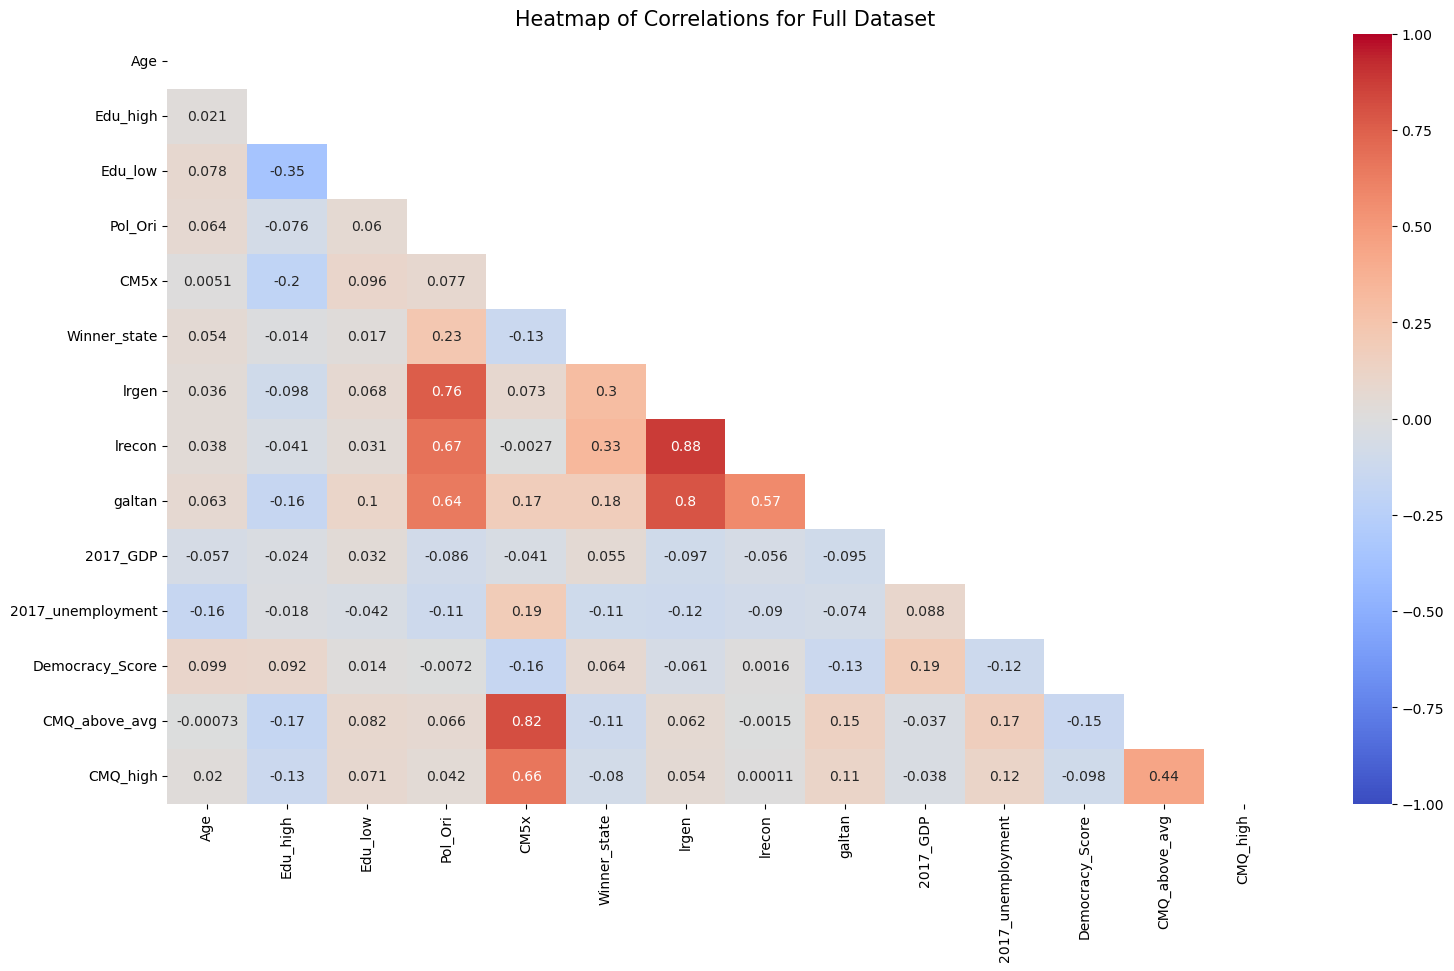

In [80]:
# Getting correlations
corr_df = df_full.corr()

# Plotting on heatmap
plt.figure(figsize=(18,10))
sns.heatmap(corr_df, cmap='coolwarm', vmin=-1, vmax=1, mask=np.triu(np.ones_like(corr_df, dtype=bool)), annot=True)
plt.title('Heatmap of Correlations for Full Dataset', fontsize=15)
plt.show()

We see some unsurprisingly high correlations here, including the following:
- Among `CM5x`, `CMQ_above_avg` and `CMQ_high` (since these are all related to high average CMQ scores)
- Among `Pol_Ori`, `lrgen`, `lrecon`, and `galtan` (since these are all measures of political orientation on the left-right spectrum).

Aside from these, we do not see many cases of high collinearity among our predictors. We do see some interesting correlations with our target variables. Let's explore these further by listing all correlations with our target.

In [81]:
# Correlations with `CM5x`
df_full.drop(columns=['CM5x','CMQ_high','CMQ_above_avg']).corrwith(df_full['CM5x']).sort_values(ascending=False)

/var/folders/q2/xb4gqdn94tb91smj01xdsd040000gn/T/ipykernel_64200/544365955.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_full.drop(columns=['CM5x','CMQ_high','CMQ_above_avg']).corrwith(df_full['CM5x']).sort_values(ascending=False)


2017_unemployment    0.191001
galtan               0.173776
Edu_low              0.096069
Pol_Ori              0.076962
lrgen                0.073039
Age                  0.005110
lrecon              -0.002654
2017_GDP            -0.040854
Winner_state        -0.133311
Democracy_Score     -0.160505
Edu_high            -0.199471
dtype: float64

We see that two of our newly added features are among the strongest correlations with our target variable: `2017_unemployment`, which has the largest positive correlation with CMQ scores, and `Democracy_Score`, which has the second-strongest negative correlation with the target. The other column we added, `2017_GDP`, has a small negative correlation with the target.

It seems that negative country-level economic indicators correlate with conspiracy mentality, and the strength (or strength as perceived by experts) of democratic institutions inversely correlates with conspiracy mentality.

We also see that possession (or disclosed possession) of a university degree is the strongest negative predictor of conspiracy mentality. Lack of (or disclosed lack of) a high school diploma is a moderately strong positive predictor.

The 'political spectrum' feature with the strongest correlation with our target is `galtan`, which reflects political party preference on a *social* left-right scale (higher values are further right). We do not see quite as strong correlations with the other political spectrum features, but we need to bear in mind that there could be non-linear relationships here (the authors of the original study were investigating the hypothesis that the relationship between political orientation and conspiracy mentality is *quadratic*--that is, U-shaped--rather than linear).

Let's see if we can discern any non-linear pattern in the relationship between `Pol_Ori` and `CM5x`. We'll try to do this by plotting the two features together on a scatterplot and also looking at histograms for the distribution of each of them individually.

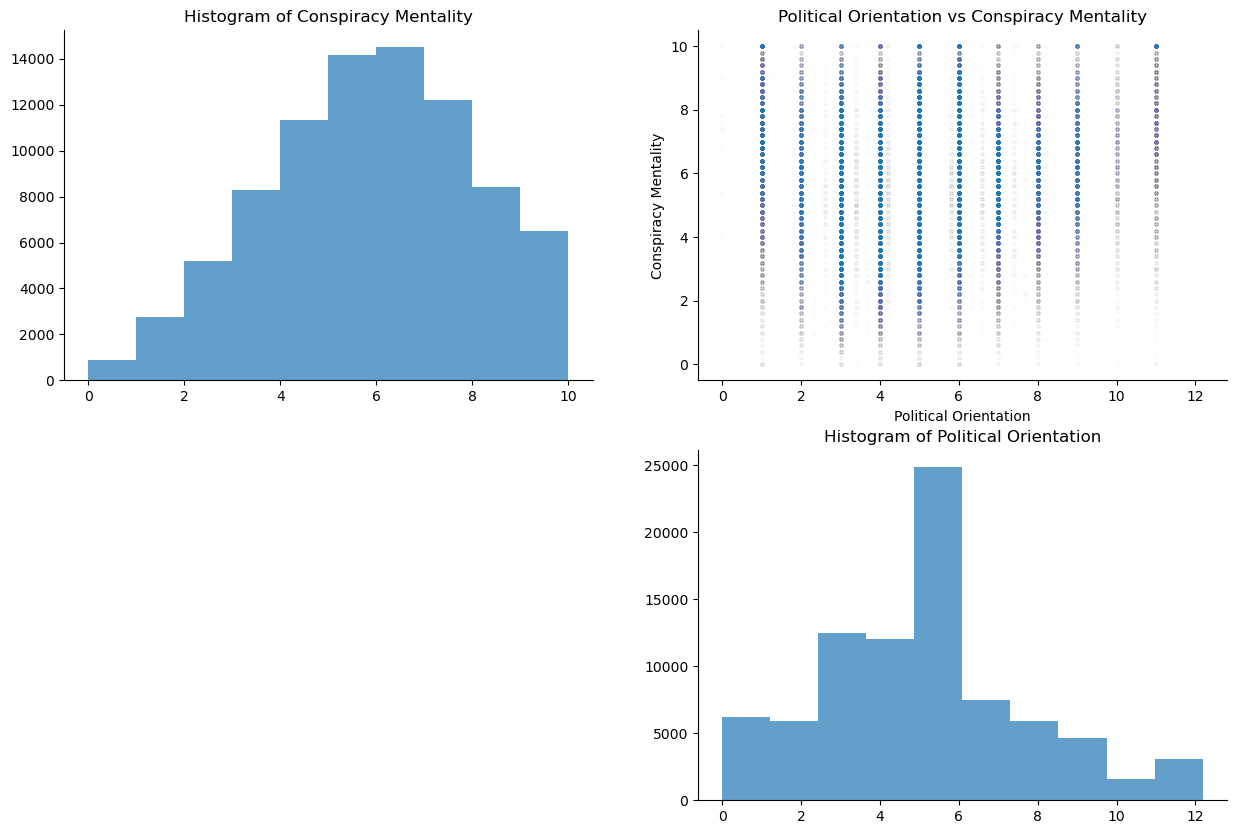

In [82]:
# Plotting Pol_Ori and CM5x on a scatterplot with histograms
plt.subplots(2,2, figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df_full['CM5x'], alpha=.7)
plt.title('Histogram of Conspiracy Mentality')

plt.subplot(2,2,2)
plt.scatter(df_full['Pol_Ori'], df_full['CM5x'], s=8, alpha=0.005)
plt.title('Political Orientation vs Conspiracy Mentality')
plt.xlabel('Political Orientation')
plt.ylabel('Conspiracy Mentality')

plt.subplot(2,2,3)
plt.gca().set_axis_off()

plt.subplot(2,2,4)
plt.hist(df_full['Pol_Ori'], alpha=.7)
plt.title('Histogram of Political Orientation')

plt.tight_layout
sns.despine()
plt.show()

It is difficult to discern much from this scatterplot, although we can perhaps see a faint 'U' shape, with fewer low conspiracy mentality scores at the extreme ends of the political spectrum. Part of the difficulty seems to be due to the fact that the values for `Pol_Ori` are clustered in the middle of the value range.

Let's see if we get a clearer picture by looking at the mean CMQ score for each point on the political orientation scale, and then plotting the political orientation scale against average CMQ score with a bar chart.

In [83]:
# Grouping by political orientation ratings and looking at mean cmq scores
pol_scores = {}
for i in range(0,13):
    mask = ((i-1) < df_full['Pol_Ori']) & (df_full['Pol_Ori'] <= i)
    mean_score = df_full[mask]['CM5x'].mean()
    pol_scores[i] = mean_score
pol_scores_df = pd.DataFrame(pol_scores, index=['Mean_CMQ'])
pol_scores_df.T

,Mean_CMQ
0,6.626230
1,6.481927
2,5.608374
3,5.370902
4,5.304119
5,5.740337
6,6.003399
7,5.608454
8,5.822000
9,6.142336


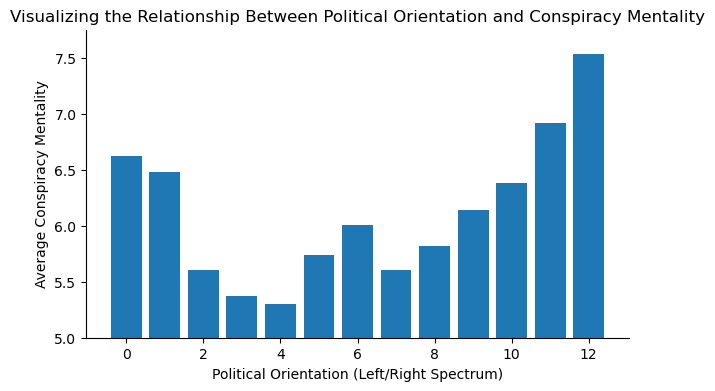

In [84]:
# Plotting
plt.figure(figsize=(7,4))
plt.bar(pol_scores_df.T.index, pol_scores_df.T['Mean_CMQ'])
plt.xlabel('Political Orientation (Left/Right Spectrum)')
plt.ylabel('Average Conspiracy Mentality')
plt.ylim(5,7.75)
plt.title('Visualizing the Relationship Between Political Orientation and Conspiracy Mentality')
sns.despine()
plt.show()

Here, we see a much clearer evidence of a quadratic relationship between political orientation and conspiracy mentality, although we seem to see higher mean scores towards the 'right' end of the political spectrum than at the 'left' end.

To the extent that our predictor variables have non-linear relationships with our target, we might expect that we will see only modest results (in terms of predictive power) from linear modelling of the data, and better results from using non-linear models.

Let's now look a bit deeper into the correlations between the two of our new features which turned out to be strong predictors (unemployment and democracy score). We can create a chart which shows how these are related, by taking averages for each country. We'll start with unemployment.

In [85]:
# Comparing unemployment and CM5x by country
unemployment_by_country = df_full.groupby('Country')['2017_unemployment'].mean()
CM_by_country = df_full.groupby('Country')['CM5x'].mean()
unemployment_sorted = pd.merge(unemployment_by_country,CM_by_country, left_on='Country', right_on='Country').sort_values(by='2017_unemployment')
unemployment_sorted

,2017_unemployment,CM5x
Country,,
Iceland,2.74,5.785631
Czechia,2.89,5.566234
Germany,3.75,5.546646
Norway,4.16,5.209950
Hungary,4.16,6.671177
Israel,4.22,6.735280
United Kingdom,4.33,6.161951
Switzerland,4.80,6.229274
Netherlands,4.84,4.683900


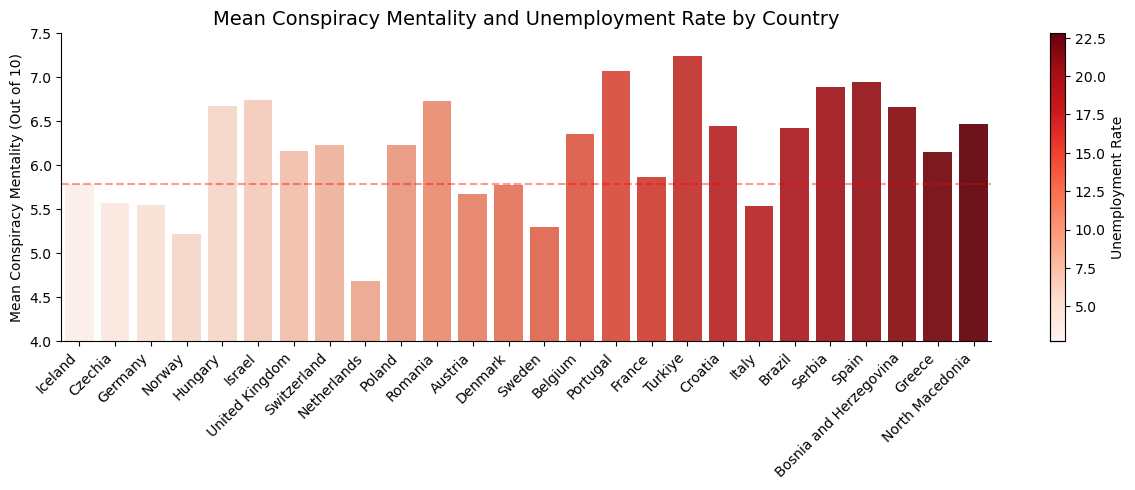

In [86]:
# Plotting on a bar chart
plt.figure(figsize=(15,4))


# Creating plot
ax = sns.barplot(y=unemployment_sorted.CM5x,
                 x=unemployment_sorted.index,
                 hue=unemployment_sorted['2017_unemployment'],
                 palette='Reds',
                 width=.8,
                 dodge=False)

# Setting up colorbar
norm = plt.Normalize(unemployment_sorted['2017_unemployment'].min(), unemployment_sorted['2017_unemployment'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
cbar = plt.gca().figure.colorbar(sm, ax=ax)
cbar.set_label('Unemployment Rate')

# Plot parameters
sns.despine()
plt.ylim(4,7.5)
plt.xlabel(None)
plt.axhline(df_full['CM5x'].mean(), color='red', linestyle='--', alpha=.4, label='Mean Conspiracy Mentality')
plt.ylabel('Mean Conspiracy Mentality (Out of 10)')
plt.xticks(rotation=45,ha='right')
plt.legend().set_visible(False)
plt.title("Mean Conspiracy Mentality and Unemployment Rate by Country", fontsize=14)
plt.show()

In this chart, we see the unemployment rate represented by the colour and positions of the bars (organized from lowest to highest going from left to right). We also see the mean conspiracy mentality score for each country on the Y-axis, and a horizontal line representing the average conspiracy mentality score for the dataset.

We can see a general trend of countries becoming higher in average conspiracy mentality as unemployment becomes higher. However, there are exceptions: for example, Hungary and Israel have relatively low unemployment rates but above average conspiracy mentality scores, while Italy has a relatively high unemployment rate but a lower than average conspiracy mentality score.

We'll repeat the same kind of chart for the relationship between democracy score and conspiracy mentality.

In [87]:
# Comparing democracy index and CM5x by country
democracy_by_country = df_full.groupby('Country')['Democracy_Score'].mean()
CM_by_country = df_full.groupby('Country')['CM5x'].mean()
democracy_sorted = pd.merge(democracy_by_country,CM_by_country, left_on='Country', right_on='Country').sort_values(by='Democracy_Score',ascending=False)
democracy_sorted

,Democracy_Score,CM5x
Country,,
Iceland,10.0,5.785631
Sweden,10.0,5.289391
Denmark,10.0,5.767273
Austria,9.0,5.666225
Switzerland,9.0,6.229274
Spain,9.0,6.937568
Portugal,9.0,7.063248
Norway,9.0,5.209950
Netherlands,9.0,4.683900


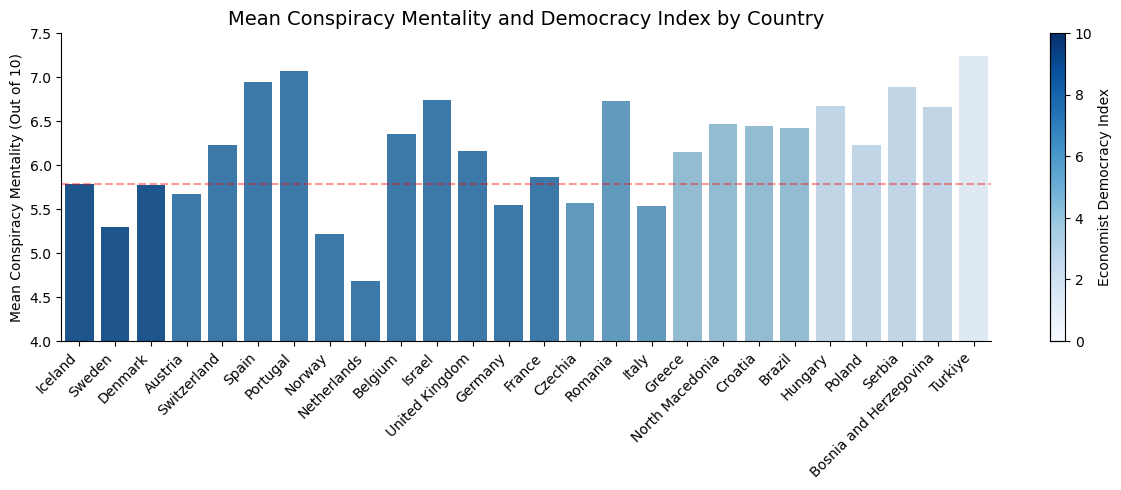

In [88]:
# Plotting
plt.figure(figsize=(15,4))


# Creating plot
ax = sns.barplot(y=democracy_sorted.CM5x,
                 x=democracy_sorted.index,
                 hue=democracy_sorted.Democracy_Score,
                 palette='Blues',
                 width=.8,
                 dodge=False)

# Setting up colorbar
norm = plt.Normalize(democracy_sorted.Democracy_Score.min(), democracy_sorted.Democracy_Score.max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
cbar = plt.gca().figure.colorbar(sm, ax=plt.gca())
cbar.set_label('Economist Democracy Index')

# Plot parameters
sns.despine()
plt.ylim(4,7.5)
plt.xlabel(None)
plt.axhline(df_full['CM5x'].mean(), color='red', linestyle='--', alpha=.4, label='Mean Conspiracy Mentality')
plt.ylabel('Mean Conspiracy Mentality (Out of 10)')
plt.xticks(rotation=45,ha='right')
plt.legend().set_visible(False)
plt.title("Mean Conspiracy Mentality and Democracy Index by Country", fontsize=14)
plt.show()

In this chart, the colour of the bars represents the democracy index rating for each country (darker blue is higher), and the bars are organized in order of their democracy index (high to low from left to right in this case). The Y-axis again represents average conspiracy mentality score, and the red horizontal dotted line represents the mean. We see a general trend of increasing conspiracy mentality going from left to right as democracy index score decreases.

But again, we see some notable exceptions: Spain and Portugal rate very highly in terms of democracy index score (both 9 out of 10) but have significantly higher than average conspiracy mentality scores on average. We do see a fairly clear pattern where countries that scored a 7 or lower on the democracy index have higher than average mean conspiracy mentality scores.

<a id = 'part4'></a>
### Part 4: Baseline Modelling

We will now move on to creating some baseline models of our data. We will create both regressor and classifier models, and then we will further investigate the most promising ones.

However, the first thing we will do is convert our categorical columns to one-hot encoding so that they can be used in our models. We'll now do that with the `Country` and `Sex` columns.

In [89]:
# One hot encoding for cateogrical variables
df_full = pd.get_dummies(df_full)

# Sanity check
df_full.head()

,Age,Edu_high,Edu_low,Pol_Ori,CM5x,Winner_state,lrgen,lrecon,galtan,2017_GDP,2017_unemployment,Democracy_Score,CMQ_above_avg,CMQ_high,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Croatia,Country_Czechia,Country_Denmark,Country_France,Country_Germany,Country_Greece,Country_Hungary,Country_Iceland,Country_Israel,Country_Italy,Country_Netherlands,Country_North Macedonia,Country_Norway,Country_Poland,Country_Portugal,Country_Romania,Country_Serbia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkiye,Country_United Kingdom,Sex_female,Sex_male,Sex_other/unknown
0,33.0,1.0,0.0,4.2,5.0,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,28.0,1.0,0.0,4.2,4.2,0.0,4.384204,4.139407,3.736392,2.472829e+10,2.74,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,55.0,1.0,0.0,5.0,4.2,1.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,52.0,0.0,1.0,5.8,5.4,0.0,5.733190,5.413070,4.886051,2.472829e+10,2.74,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,56.0,0.0,1.0,5.0,6.8,0.0,5.058697,4.776238,4.311222,2.472829e+10,2.74,10,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


To avoid issues of multi-collinearity (i.e., collinearity between groups of predictors and other predictors), we need to drop one each of the dummy variable columns. We'll drop `Country_Iceland` and `Sex_other/unknown`.

In [90]:
# Dropping dummy columns to avoid multicollinearity
df_full.drop(columns=['Country_Iceland','Sex_other/unknown'], inplace=True)

# Checking
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84264 entries, 0 to 84263
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             84264 non-null  float64
 1   Edu_high                        84264 non-null  float64
 2   Edu_low                         84264 non-null  float64
 3   Pol_Ori                         84264 non-null  float64
 4   CM5x                            84264 non-null  float64
 5   Winner_state                    84264 non-null  float64
 6   lrgen                           84264 non-null  float64
 7   lrecon                          84264 non-null  float64
 8   galtan                          84264 non-null  float64
 9   2017_GDP                        84264 non-null  float64
 10  2017_unemployment               84264 non-null  float64
 11  Democracy_Score                 84264 non-null  int64  
 12  CMQ_above_avg                   

We can now move on to our first baseline model.

<a id = '4.1'></a>
### 4.1 Regressors

#### Linear Regression

The first model we will try is linear regression. We saw earlier that there could be nonlinear relationships between some our predictors and the target, so it is possible that we will not achieve much predictive power with a linear model.

To evaluate the results, we will look at the R-squared score for the model, which tells us how much of the variance in our target variable is explained by our model (that is, roughly, how much of a reduction of the error between predictions and observed values we achieve by using our model instead of just predicting the mean value for every data point). A low R-squared score does not necessarily mean that the model is performing poorly. If we need to use our model to generate relatively precise predictions for new data, then a lower R-squared value will be a dealbreaker. But in this case, what we are most interested in is understanding how the model is working, which coefficients have the biggest effects on our model, and whether these are statistically significant. In other words, what we are most interested in is *interpretation* rather than predictive power.

For now, we will construct a linear regression model and try to see which of our predictors have the most influence on the model. Then, we will move on to non-linear models, where we will sacrifice some interpretability for (hopefully) increases in predictive power.

We will split our data into predictors and target, and then we will split between training and test sets.

In [91]:
# Setting up X and y
X = df_full.drop(columns=['CM5x','CMQ_high','CMQ_above_avg'])
y = df_full['CM5x']

print(X.shape)
print(y.shape)

(84264, 38)
(84264,)


In [92]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Checking
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(67411, 38)
(67411,)
(16853, 38)
(16853,)


We can also scale our data to allow for easier comparison of the coefficients of the model. We will fit a scaler to our training data and then use it to transform both the training and test data.

We'll also scale a version of the whole dataset (before the train/test split), which we will use with our first linear regression model. We'll create a dataframe with this version that includes the column names, since we will need these to interpret our linear regression model.

In [93]:
# Scaling X for train and test
from sklearn.preprocessing import StandardScaler
 
my_scaler = StandardScaler()
X_scaled = my_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

We will now fit and score our linear regression model.

In [94]:
import statsmodels.api as sm

X_with_cons = sm.add_constant(X_scaled)

# Instantiating and fitting the model
myregression = sm.OLS(y, X_with_cons)
myregression_results = myregression.fit()

# Looking at the summary results
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CM5x   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     636.4
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:12:31   Log-Likelihood:            -1.7446e+05
No. Observations:               84264   AIC:                         3.490e+05
Df Residuals:                   84228   BIC:                         3.493e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              5.7799      0.007    874.460      0.000       5.767       5.793
Age                                0.0907      0.007     12.905      0.000       0.077       0.104
Edu_high                          -0.3062      0.007    -41.846      0.000      -0.321      -0.292
Edu_low                            0.0528      0.007      7.299      0.000       0.039       0.067
Pol_Ori                            0.0172      0.010      1.638      0.101      -0.003       0.038
Winner_state                      -0.2443      0.007    -33.192      0.000      -0.259      -0.230
lrgen                              0.2338      0.023     10.204      0.000       0.189       0.279
lrecon                            -0.3000      0.016    -18.321      0.000      -0.332      -0.268
galtan                             0.2714      0.013     20.904      0.000       0.246       0.297
2017_GDP                          -0.0547      0.017     -3.231      0.001      -0.088      -0.022
2017_unemployment                  0.1597      0.015     10.744      0.000       0.131       0.189
Democracy_Score                   -0.0738      0.017     -4.360      0.000      -0.107      -0.041
Country_Austria                   -0.0533      0.011     -4.760      0.000      -0.075      -0.031
Country_Belgium                    0.0977      0.013      7.582      0.000       0.072       0.123
Country_Bosnia and Herzegovina    -0.0196      0.007     -2.942      0.003      -0.033      -0.007
Country_Brazil                     0.0196      0.007      2.770      0.006       0.006       0.033
Country_Croatia                    0.0202      0.007      3.015      0.003       0.007       0.033
Country_Czechia                   -0.0025      0.008     -0.325      0.745      -0.018       0.013
Country_Denmark                   -0.0157      0.012     -1.358      0.174      -0.038       0.007
Country_France                     0.0474      0.006      8.181      0.000       0.036       0.059
Country_Germany                   -0.0178      0.005     -3.341      0.001      -0.028      -0.007
Country_Greece                    -0.0257      0.007     -3.913      0.000      -0.039      -0.013
Country_Hungary                    0.0841      0.009      9.789      0.000       0.067       0.101
Country_Israel                     0.0701      0.008      8.883      0.000       0.055       0.086
Country_Italy                     -0.1086      0.006    -17.880      0.000      -0.121      -0.097
Country_Netherlands               -0.4134      0.024    -17.479      0.000      -0.460      -0.367
Country_North Macedonia           -0.0090      0.007     -1.368      0.171      -0.022       0.004
Country_Norway                    -0.0860      0.011     -7.563      0.000      -0.108      -0.064
Country_Poland

We are seeing a low R-squared score: our model can predict only about 21% of the variance in the target variable. However, this is not unexpected. We know that there are some non-linear relationships between our predictors and our target. We might see better predictive power from a non-linear regressor. But we should also bear in mind that our dataset involves noisy, human-generated survey data; it might not be possible to explain very high proportions of the variance, even with a non-linear model. 

Despite the low R-squared value, we are seeing statistically significant relationships with many of our predictors, and relatively high coefficients for many of the features we would expect based on our earlier statistical analysis (e.g., `Winner_state`, `lrgen`, `galtan`, and `2017_unemployment`). We are also seeing some p-values above .05, which we would want to remove in further iterations of the model. We have also not done a thorough assessment of multicollinearity in our predictors, and doing so would help with our ability to interpret the model, and nor have we assessed the residuals of the model. But we will not do these things with our baseline model at this point.

We will now move on to some non-linear regressors. Our goal here will be to see if we can increase the R-squared value.

#### Decision Tree Regressor

We will now try a decision tree regressor model. This model will generate a continuous estimate of our target variable by creating a series of binary decisions involving our predictors (e.g., 'Is Pol_Ori > x and galtan < y?'). If we do not set a maximum depth for our tree (the maximum number of such decision points), the model is likely to overfit to the training data. To check this, we will use a train/test split. We'll check the R-squared values for different maximum depths.

**Note**: we are only checking different hyperparameters on our test data here because this is a baseline model. If we were moving beyond baseline modelling, we would need to have a separate validiation set for hyperparameter optimization, and we would reserve the test data for the final split. We will do a separate train/validation/test split when we move beyond baseline modelling.

In [95]:
from sklearn.tree import DecisionTreeRegressor

depths = range(1,12)
train_r2s = {}
test_r2s = {}

for depth in depths:
    
    # Instantiating
    r_tree = DecisionTreeRegressor(max_depth=depth)

    # Fitting
    r_tree.fit(X_train, y_train)

    # Appending
    train_r2 = r_tree.score(X_train, y_train)
    test_r2 = r_tree.score(X_test, y_test)
    train_r2s[depth] = train_r2
    test_r2s[depth] = test_r2

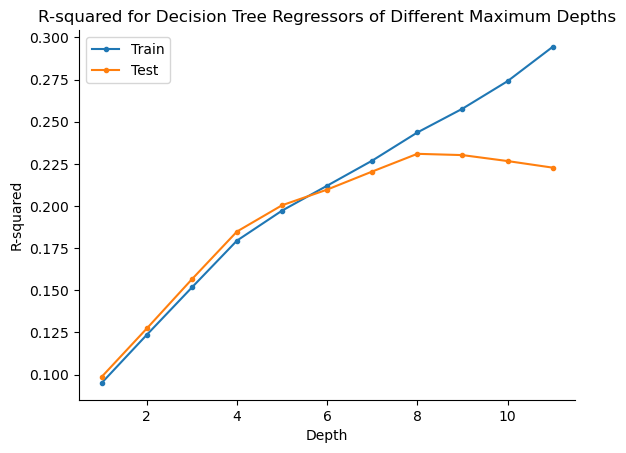

In [96]:
# Plotting
plt.figure()
plt.plot(train_r2s.keys(), train_r2s.values(), marker='.', label='Train')
plt.plot(test_r2s.keys(), test_r2s.values(), marker='.', label='Test')
plt.xlabel('Depth')
plt.ylabel('R-squared')
plt.title('R-squared for Decision Tree Regressors of Different Maximum Depths')
plt.legend()
sns.despine()
plt.show()

We see only marginally better results from our decision tree regressor. The tree is not badly overfitting up to a maximum depth of 8, but the best R-squared score on the test data is only slightly better than that of our linear regression model.

#### Ensemble Regressors

Let's try two ensemble regressor models: a random forest regressor and a gradient boosting regressor.


In [97]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate
forest = RandomForestRegressor(max_depth=7)

# Fit
forest.fit(X_train, y_train)

# Score
print(f'R^2 for Train Data: {forest.score(X_train, y_train)}')
print(f'R^2 for Test Data: {forest.score(X_test, y_test)}')

R^2 for Train Data: 0.2430365646519742
R^2 for Test Data: 0.238302497563586


In [98]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate
boost = GradientBoostingRegressor(max_depth=5)

# Fit
boost.fit(X_train, y_train)

# Score
print(f'R^2 for Train Data: {boost.score(X_train, y_train)}')
print(f'R^2 for Test Data: {boost.score(X_test, y_test)}')

R^2 for Train Data: 0.286833141874984
R^2 for Test Data: 0.2747427550375092


We see the best R-squared score yet from our gradient boosting regressor. This model is difficult to interpret, but we can revisit this in the future to see if we can use some model-agnostic methods for interpretation to see if we can learn anything from this model.

We'll now move onto baseline classification models.

<a id = '4.2'></a>
### 4.2 Classifiers

#### Logistic Regression

We'll start with a basic linear classification model. We will use the `CMQ_above_avg` feature as our target, and we will look at the accuracy score as well as false positive and false negative counts for the model.

In [99]:
# Resetting X and y
X = df_full.drop(columns=['CM5x','CMQ_high','CMQ_above_avg'])
y = df_full['CMQ_above_avg']

print(X.shape)
print(y.shape)

(84264, 38)
(84264,)


Let's also check the imbalance in `CMQ_above_avg` to understand what to expect from our model's performance (the more imbalanced it is, the easier it will be for the model to achieve a high accuracy score).

In [100]:
# Percentages of observations for high (1) and non-high (0) conspiracy mentality
y.value_counts()/len(y)*100

1    52.794788
0    47.205212
Name: CMQ_above_avg, dtype: float64

This is fairly balanced. We would expect the model to achieve an accuracy of ~53% if it simply guessed 'class 1' for every data point.

In [101]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

# Checking
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(67411, 38)
(67411,)
(16853, 38)
(16853,)


We will also scale the data again to make it easier to interpret the coefficients of our model.

In [102]:
# Scaling X for train and test
my_scaler = StandardScaler()
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.transform(X_test)

Now we will create, fit and score our logistic regression model.

In [103]:
from sklearn.linear_model import LogisticRegression

# Instantiate and fit
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Scoring on train and test
print(f'Train Score: {logreg.score(X_train, y_train)}')
print(f'Test Score: {logreg.score(X_test, y_test)}')

Train Score: 0.6781385827238878
Test Score: 0.6751320239719931


This seems to be a decent score for a baseline model. Our model correctly classified about 66% of data points in test data. Again, we know there are non-linear relationships between predictors and the target that the model cannot capture, and we know that our data is messy.

Let's also look at the confusion matrix to see the false positive and false negative counts, as well as the classification report.

Model Evaluation and Confusion Matrix for Test Data

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      8029
           1       0.68      0.71      0.69      8824

    accuracy                           0.68     16853
   macro avg       0.67      0.67      0.67     16853
weighted avg       0.67      0.68      0.67     16853



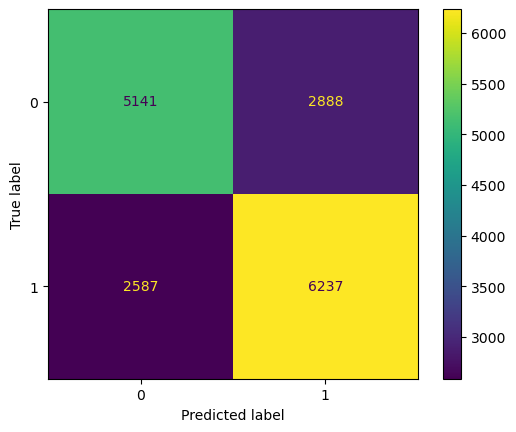

In [104]:
# Generating confusion matrix for logistic regression model, train
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

y_test_pred = logreg.predict(X_test)

print("===================================================")
print("Model Evaluation and Confusion Matrix for Test Data")
print("===================================================\n")
print(classification_report(y_test, y_test_pred))

We see that the model is achieving slightly better precision and recall for class 1 (so it is better at using the class 1 label only for genuine cases of class 1 and it is more sensitive to class 1 than class 0). This could because of the slight imbalance in our data that we observed earlier.

Let's also look at the top coefficients in the model to see what the classifications are based on.

In [105]:
# Displaying the coefficients for the baseline logistic regression model
coef_dict = {}
coef_list = list(zip(logreg.coef_[0], X.columns))

for coef, feature in coef_list:
    coef_dict[feature] = coef
    
coef_df = pd.DataFrame(coef_dict, index=['Coef'])
coef_df.T.sort_values(by='Coef', ascending=False)

,Coef
galtan,0.240342
lrgen,0.218655
Country_Portugal,0.215217
Country_Spain,0.202276
2017_unemployment,0.145026
Sex_female,0.118471
Country_Romania,0.097562
Country_Turkiye,0.094008
Country_Belgium,0.091431
Country_Hungary,0.076147


We are seeing similar influences from our features as with linear regression. Something that stands out here is the strong negative coefficient for `lrecon`, since our other political orientation features correlate (fairly strongly) positively with the target.

Finally, let's try some non-linear classification models.

#### K-Nearest Neighbors

We will see if a non-linear classification model (K-nearest neighbors, or KNN) can achieve better accuracy and recall scores than logistic regression.

In [106]:
from sklearn.neighbors import KNeighborsClassifier

# Trying KNN with Ks in range from 1 to 15

Ks = range(1,15)

train_acc = []
test_acc = []

for K in Ks:
    
    # Instantiate and fit the model
    KNN_model = KNeighborsClassifier(n_neighbors=K)
    KNN_model.fit(X_train, y_train)

    # Score the model on the train and test set, append to list
    train_predictions = KNN_model.predict(X_train)
    test_predictions = KNN_model.predict(X_test)
    train_accuracy = accuracy_score(train_predictions, y_train)
    test_accuracy = accuracy_score(test_predictions, y_test)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

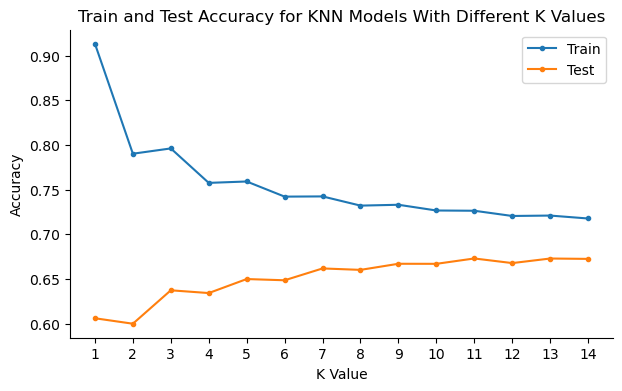

In [107]:
# Plotting train vs test for different K values
plt.figure(figsize=(7,4))
plt.plot(Ks, train_acc, marker='.', label='Train')
plt.plot(Ks, test_acc, marker='.', label='Test')
plt.xticks(Ks)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title("Train and Test Accuracy for KNN Models With Different K Values")
plt.legend()
sns.despine()
plt.show()

We see here that the accuracy score for the test data plateaus before it reaches the level achieved by our logistic regression model. The non-linear KNN model does not seem to mark any improvement over the simple linear classifier.

#### Ensemble Classifiers

The last thing we will try is an ensemble classifier model, the gradient boost classifier. 

In [108]:
# Importing and Instantiating
from sklearn.ensemble import GradientBoostingClassifier

boostc = GradientBoostingClassifier(max_depth=5)

# Fit
boostc.fit(X_train, y_train)

# Score
print(f'Accuracy for Train Data: {boostc.score(X_train, y_train)}')
print(f'Accuracy for Test Data: {boostc.score(X_test, y_test)}')

Accuracy for Train Data: 0.7036982094910326
Accuracy for Test Data: 0.6896101584287664


We see a slight increase in the test accuracy score from our logistic regression. Let's also look at the confusion matrix and classification report for this model.

Model Evaluation and Confusion Matrix for Test Data

              precision    recall  f1-score   support

           0       0.69      0.63      0.66      8029
           1       0.69      0.74      0.72      8824

    accuracy                           0.69     16853
   macro avg       0.69      0.69      0.69     16853
weighted avg       0.69      0.69      0.69     16853



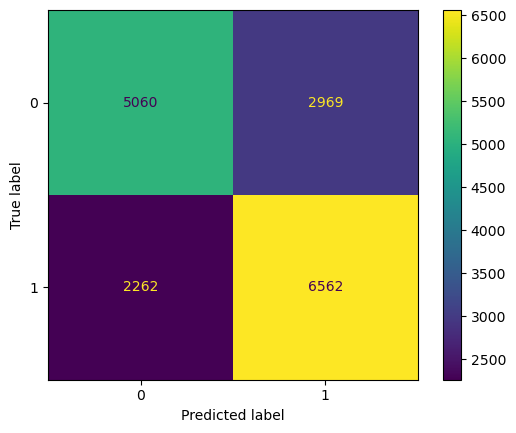

In [109]:
y_test_pred = boostc.predict(X_test)
ConfusionMatrixDisplay.from_estimator(boostc, X_test, y_test)
print("===================================================")
print("Model Evaluation and Confusion Matrix for Test Data")
print("===================================================\n")
print(classification_report(y_test, y_test_pred))

We see that our gradient boosting classifier is slightly more imbalanced in recall scores between class 1 and class 0 (.74 to .63) than our logistic regression. We should see how we can achieve a better balance in future experimenting with the models.

Let's summarize our baseline modelling efforts in a table.

| **Model**                    | **Scoring**                                                            | **Notes**                                                                                                                  |
|:------------------------------|:------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------|
| Linear Regression            | $R^2$: 0.21                                                            | Many statistically significant features, but low $R^2$ score.                                                              |
| Decision Tree Regressor      | $R^2$: 0.23                                                            | Best results around max_depth of 8. Not much improvement over linear regression in $R^2$.                                  |
| Random Forest Regressor      | $R^2$: 0.24                                                            | Only slight improvement in $R^2$ score; tried max_depth of 7.                                                               |
| Gradient Boosting Regressor  | $R^2$: 0.27                                                            | Best $R^2$ among regressors, at max_depth of 5. This model will be difficult to interpret compared to linear regression.   |
| Logistic Regression          | Accuracy: 0.68 <br> Recall (Class 1): 0.71 <br> Recall (Class 2): 0.64 | Slight imbalance in recall between classes. Influential coefficients were similar to those in the linear regression model. |
| KNN                          | Accuracy: 0.67                                                         | Tried k values between 1 and 15, and none showed any improvement over logistic regression.                                 |
| Gradient Boosting Classifier | Accuracy: 0.69<br> Recall (Class 1): 0.74<br> Recall (Class 2): 0.63   | Slight improvement in accuracy over logistic regression, but worse imbalance in recall between classes                     |

<a id = 'conclusion'></a>
### Conclusion and Next Steps

We now have the data cleaned and prepared for modelling, and we have constructed baseline models and evaluated their performance on key metrics, including the $R^2$ score, coefficient weights, and p-values for coefficients for regressor models, and coefficient weights, accuracy, and recall for both classes for classifier models.

Although we've only started modelling the data, we can draw certain tentative conclusions at this point.

- It appears that unemployment percentage, preference for socially right-wing parties (`galtan`), and lack of a high school diploma are among the strongest positive predictors of conspiracy mentality.
- It appears that higher education, high country-level democracy index scores, and one's favoured political party being in power are among the strongest negative predictors of conspiracy mentality.
- Although certain measures of political orientation (including self-reported location on a left-right spectrum) seem not to have a strong linear relationship with conspiracy mentality, they do seem to be connected through a quadratic relationship (as discussed in the original article by Imhoff et al.), with higher mean scores of conspiracy mentality at the political poles.

In the next phase of the project, we will try to improve our models and optimize hyperparameters using cross validation and machine learning pipelines (which will allow us to test various permutations of parameter settings at once). We will also try to use clustering, an unsupervised form of machine learning, to see if we can discern patterns in our data that reveal something about who is likely to believe conspiracy theories.